# Проект: Прогнозирование оттока телеком компании

## Описание проекта

В рамках данного проекта мы выступаем в роли специалиста Data Science. К нам поступил запрос от заказчика, который сформулировал задачу, дал некоторую информацию о своём бизнесе и предоставил сопутствующие данные. Доменная область — телекоммуникации. Мы должны проработать запрос и предоставить решение.

### Описание задачи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг:

1. Стационарная телефонная связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Проработка запроса

Наш заказчик — менеджер компании, отвечающий за удержание клиентов, цель которого предсказать возможный их уход. Если клиент собирается расторгнуть договор с компанией, то ему будут предложены специальные условия, скидки и промокоды. Это значит, что компания произведёт некоторые финансовые затраты для того, чтобы клиент остался. От точности прогноза, уйдёт клиент или нет, будет зависеть объём возможных убытков:

- Если клиент собирается расторгнуть договор, а мы не смогли предсказать этого, то он уйдёт и компания потеряет потенциальную прибыль. Привлечение новых клиентов тоже стоит денег;
- Если клиент не собирается уходить, а мы отметили его как уходящего, то затраты на удержание будут излишними. Деньги будут потрачены впустую. 

Сама же поставленная задача является задачей бинарной классификации, где положительный класс означает уход клиента, а отрицательный — что он не уходит. Идеальным результатом будет точное определение истинного класса клиента и минимизация ложных прогнозов. Для решения такой задачи нам понадобятся алгоритмы машинного обучения, которые на основе исторических данных смогут сделать прогноз — предположить к какому классу относится пользователь. 

Точность прогноза зависит от того, сможет ли алгоритм найти взаимосвязи между персональными данными и фактом расторжения договора. Способствовать этому мы можем с помощью манипуляций с данными: выявить закономерности, очистить данные и убрать шум, добавить новые, более явные зависимости на основе имеющихся.

После всех манипуляций с данными и настройки алгоритма мы получим обученную модель, готовую предсказывать возмодный уход. Качество этой модели мы сможем оценить с помощью метрики *AUC-ROC* — меры способности модели-классификатора различать классы. Несомненным плюсом этой метрики является то, что она не чувствительна к дисбалансу классов, если такой обнаружится в данных. Согласно запросу заказчика данная метрика при моделировании не должна быть ниже значения $0.85$. Для интерпретируемости результатов мы будем использовать ещё одну метрику — *accuracy* – доля правильных ответов модели, где $0$ означает, что модель не смогла угадать ни одного класса, а $1$ — модель угадала абсолютно все классы.

Исходя из вышеописанного, сформулируем цели и задачи данного проекта, а также прототип решения — план.

### Цель проекта

Научиться прогнозировать отток клиентов на основе предоставляемых данных.

### Задача проекта

Разработать модель, которая будет предсказывать отток клиентов с достаточной точностью. 

### План работы

- **Обзор данных**. Сперва мы загрузим данные и изучим их. Ознакомимся с общей информацией каждой таблицы, проверим корректность данных: описание признаков, наличие пропусков и дубликатов записей, используемые типы данных, уникальные значения. Попробуем отметить какие-либо особенности данных. По итогу мы должны иметь общее представление с тем, что имеем и какие проблемы присутствуют.
- **Предобработка и анализ данных**. Здесь мы исправим возникшие проблемы и проведём более глубокий анализ: попробуем найти закономерности, а также используем корреляционный анализ признаков. На данном этапе мы должны достичь корректности данных и иметь представление о наиболее важных признаках.
- **Подготовка признаков**. Далее мы выделим целевой признак, разделим данные на обучающую и тестовую выборки. Удалим малоинформативные признаки и, по возможности, добавим новые. Также проведём нормирование и кодирование значений. В результате мы должны получить подготовленные данные для дальнейшего моделирования.
- **Моделирование**. Выберем несколько алгоритмов и составим сетки гиперпараметров. Проведём обучение моделей с помощью кросс-валидации, после чего выберем лучшую модель по результатам выбранной метрики.
- **Тестирование**. Напоследок мы проверим выбранную модель на отложенной выборке и проанализируем результаты эксперимента. 

## Подготовка проекта

Здесь будет размещена вся техническая часть проекта: необходимые загрузки и импорты библиотек/пакетов, их настройки, константы и пользовательские функции.

### Импорты

In [1]:
# загружаем стандартные пакеты/библиотеки
import re
import warnings

# загружаем сторонние пакеты/библиотеки
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

### Настройки

In [2]:
# устанавливаем настройки предуперждений
warnings.filterwarnings('ignore')

# устанавливаем настройки датафрейма
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

# устанавливаем настройки графиков
sns.set_style('whitegrid')

# настраиваем графики по умолчанию
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.labelpad'] = 20

rcParams['figure.figsize'] = [12, 6]
rcParams['figure.autolayout'] = True

rcParams['font.size'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

### Константы

In [3]:
# инициируем переменные локальных путей к файлам
LOCAL_PATH_CONTRACT = 'contract_new.csv'
LOCAL_PATH_PERSONAL = 'personal_new.csv'
LOCAL_PATH_INTERNET = 'internet_new.csv'
LOCAL_PATH_PHONE = 'phone_new.csv'

# инициируем переменную для воспроизводимости случайных чисел
RANDOM_STATE = 280823

# инициируем дату выгрузки данных
UPLOAD_DATE = pd.Timestamp('2020-02-01')

### Функции

In [4]:
# объявляем функцию для подсчёта уникальных значений
def get_nunique(data):
    '''
    Функция подсчитывает количество
    уникальных значений каждого столбца датафрейма.
    На вход принимает датафрей.
    
    Параметры:
    ----------
    data : DataFrame
        pandas датафрейм
        
    Возвращает:
    -----------
    Функция выводит на экран имя столбца
    и количество уникальных значений в нём
     '''
    # инициируем имена столбцов     
    names = data.columns
    print('-' * 42)
    # циклом перебираем имена     
    for i, name in enumerate(names):
        # выводим имя столбца и количество уникальынх значений         
        print(f'{i}  {name}: {data[name].nunique()}')
        print('-' * 42)

In [5]:
# объявляем функцию категоризации признака
def automatic_payment(payment):
    '''
    Функция назначает новую категорию
    способу оплаты, принимая на вход
    значение старой категории.
    
    Параметры:
    ----------
    payment : str
        строковое значение категории
    
    Возвращает:
    -----------
    'Yes' : если во входящем значении встречается
    строка "automatic"
    'No' : в иных случаях
    '''
    # условие вхождения строки в категорию     
    if re.findall(r'automatic', payment):         
        return 'Yes'
    else:
        return 'No'

In [6]:
# объявляем функцию подсчёта сервисов
def count_services(row):
    '''
    Функция считает количество сервисов,
    которые использовал пользователь.
    
    Параметры:
    ----------
    row : Series
        Строка датафрейма
        
    Возвращает:
    -----------
    Количество сервисов, int
    '''
    # выбираем интернет-услуги     
    services = row[13:19]
    # создаём список с подключёнными сервисами     
    services_list = list(services == 'Yes')
    # считаем количество      
    count = sum(services_list)
    
    # возвращаем результат     
    return count

In [7]:
# объявляем функцию для переименовывания значений
def replace_values(data, col_list, map_dict):
    '''
    Функция переименовывает значения признаков,
    согласно созданному словарю. 
    
    Параметры:
    ----------
    data : DataFrame
        Датафрейм с данными
    col_list : list
        Список признаков, в которых будут происходить
        изменения
    map_dict : dict
        словарь со значениями, согласно которому
        будет происходить соответствующие изменения
        
    Возвращает:
    -----------
    Датафрейм с изменёнными значениями по заданным условиям
    '''
    # создаём копию данных     
    data_map = data.copy()
    # индексируемся на нужные признаки и изменяем значения     
    data_map[col_list] = data[col_list].replace(map_dict)
    
    # возвращаем результат     
    return data_map

In [8]:
# объявляем функцию для вывода комплексной оценки
def get_report_scores(model, X, y_true):
    '''
    Функция выводит комплексную оценку качества классификатора,
    включающую в себя полный отчёт классификации, 
    матрицу ошибок и AUC-ROC кривую для сравнения результата
    с фиктивной моделью.
    
    Параметры:
    ----------
    model : estimator
        модель
    X : array 
        Массив признаков
    y_true : array
        Массив истинных значений класса
        
    Возвращает:
    -----------
    Функция возвращает classification_report,
    показания TPR и FPR, матрицу ошибок и AUC-ROC кривую. 
    '''
    # делаем фиктивные предсказания
    dummy = pd.Series(0, index=y_true.index)
    # делаем предсказания
    y_pred = model.predict(X)
    # делаем предсказания вероятностей     
    y_pred_proba = model.predict_proba(X)
    
    # получаем имя текущей модели
    name = type(model[1]).__name__ 
    
    # основные метрики классификации
    cr = classification_report(y_true, y_pred, target_names=['class 0', 'class 1'], zero_division=1)
    
    # получаем положительные и отрицательные овтеты
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # считаем долю положительных ответов
    tpr = tp / (tp + fn)
    # считаем долю отрицательных ответов
    fpr = fp / (fp + tn)
    
    # выводим метрики:
    print('-' * 53)
    # заголовок отчёта
    print(f'Отчет о результатах {name}')
    print('-' * 53)
    # основные оценки классификации
    print(cr)
    print('-' * 53)
    
    # выводим дополнительные характеристики:
    print(f'True Positive Rate: {tpr.round(2)} | False Positive Rate: {fpr.round(2)}')
    print('-' * 53)
    
    # выводим графики:
    # настраиваем общую фигуру
    fig, (ax_cm, ax_rc) = plt.subplots(1, 2, figsize=(14, 7))
    # строим матрицу неточностей
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax_cm)
    # настраиваем график
    ax_cm.set_title('Matrix Confusion')
    ax_cm.grid(False)
    
    # строим roc-кривую фиктивной модели:
    RocCurveDisplay.from_predictions(y_true, dummy, name='DummyClassifier', ax=ax_rc, linestyle='--')
    # строим roc-кривую текущей модели:
    RocCurveDisplay.from_predictions(y_true, y_pred_proba[:, 1], name=name, ax=ax_rc)
    
    # настраиваем график
    ax_rc.set_title('ROC-curve')
    ax_rc.set_xlabel('False Positive Rate')
    ax_rc.set_ylabel('True Positive Rate')

## Обзор данных 

Загрузим данные и изучим их. Ознакомимся с общей информацией каждой таблицы. Посмотрим описание признаков, уникальные значения,  используемые типы данных, наличие пропусков и дубликатов. Попробуем отметить какие-либо особенности данных и обнаруженные проблемы.

In [9]:
# загружаем данные из локальной директории
contract = pd.read_csv(LOCAL_PATH_CONTRACT)
personal = pd.read_csv(LOCAL_PATH_PERSONAL)
internet = pd.read_csv(LOCAL_PATH_INTERNET)
phone = pd.read_csv(LOCAL_PATH_PHONE)

### Договоры

In [10]:
# выводим первые строки данных
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


In [11]:
# выводим общую информацию
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Данные файла `contract_new.csv` загрузились корректно. Таблица содержит информацию о договорах пользователей, описанных несколькими признаками. Перечислим их и отметим наблюдения по каждому признаку, которые можно заметить:

- `customerID` — идентификационный номер пользователя. Всего $7043$ записи. Все ли они уникальны? 
- `BeginDate` — дата начала пользования услугами. Тип данных указан как `object`, но значения признака явный `datetime`;
- `EndDate` — дата окончания пользования услугами. Есть стрококове значение `No`, явно указывает нам на действующий договор (отрицательный класс). Выгрузка данных произошла `2020-02-01` и тем, кто имел действующий договор, было назначено значение, отличное от даты. Также наблюдается запись с датой расторжения договора (положительный класс). С помощью этого признака мы выделим целевой. После замены строкового значения тип данных можно сменить на `datetime`;
- `Type` — тип оплаты. Категориальный признак. Наблюдаются две категории, но описание услуг указывает на три категории: месяц, год, два года. Уникальность значений надо проверить; 
- `PaperlessBilling` — электронный платёжный документ. На первый взгляд тут два значения — `Yes`, `No`. Подразумевается булевый тип данных. Но перед сменой типа необходимо проверить количество уникальных значений признака;
- `PaymentMethod` — способ оплаты. Категориальный признак. Несколько категорий. Имеются автоматические способы списания средств за услуги;
- `MonthlyCharges` — ежемесячные траты на услуги. Тип данных соответствует значениям признака;
- `TotalCharges` — всего потрачено денег на услуги. Тип данных `object`. Скорее всего в значениях признака присутствует строковый тип данных.


Итак, таблица имеет $7043$ записи, которые описывают $8$ признаков. Имена столбцов не соответствуют хорошему силю написания. Есть некорректно определённые типы данных, имеются смешанные типы в значениях некоторых признаков. Пропусков не обнаружено. Проверим данные на дублирующие записи и количество уникальных значений в каждом признаке.

In [12]:
# считаем количество дубликатов
contract.duplicated().sum()

0

In [13]:
# считаем количество уникальных значений
get_nunique(contract)

------------------------------------------
0  customerID: 7043
------------------------------------------
1  BeginDate: 77
------------------------------------------
2  EndDate: 67
------------------------------------------
3  Type: 3
------------------------------------------
4  PaperlessBilling: 2
------------------------------------------
5  PaymentMethod: 4
------------------------------------------
6  MonthlyCharges: 1585
------------------------------------------
7  TotalCharges: 6658
------------------------------------------


Все записи уникальны, дубликатов нет. Уникальные значения `customerID` совпадают с количество записей таблицы, один идентификатор — одна запись. Кардинальность `Type` подтверждается, в значениях три категории: месяц, год, два года. `PaperlessBilling` биномиален, можно перевести в булев тип данных. `PaymentMethod` имеет всего четыре категории, следовательно, два способа оплаты автоматические, два других — нет (первые десят строк содержат все четыре категории).

Проверим признак `EndDate`, есть ли там помимо дат и строкового значения `No` что-то ещё.

In [14]:
# инициируем множество
value_set = set()

# перебираем уникальные значения в признаке
for i in set(contract.EndDate):
    # проверяем условие регулярками     
    if re.fullmatch(r'\d{4}-\d{2}-\d{2}', i) or \
    re.fullmatch(r'No', i):
        # в случае True продолжаем цикл         
        continue
    # в случае False     
    else:
        # добавляем значение во множество 
        value_set.add(i)

# считаем длину множества
len(value_set)

0

В признаке кроме дат и строкового занчения `No` ничего не оказалось. Наша гипотеза о действующих договорах подтвердилась. Теперь узнаем, что за строковые значения имеются в числовом признаке `TotalCharges`. 

In [15]:
# инициируем множество
value_set = set()

# перебираем уникальные значения в признаке
for i in set(contract.TotalCharges):
    # проверяем условие регулярками
    if re.fullmatch(r'\d+\.\d+', i):
        # в случае True продолжаем цикл
        continue
    # в случае False
    else:
        # добавляем значение во множество
        value_set.add(i)

# выводим множество на экран
value_set

{' '}

В `TotalCharges` помимо чисел встречается пробельный символ. Взглянем на записи с таким значением в признаке.

In [16]:
# индексируемся на записи с пробелом
contract.loc[contract.TotalCharges == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Таких записей оказалось немного. Примечательно, что договоры из этого среза были оформлены в день даты выгрузки данных. Это объясняет, почему `TotalCharges` не имеет числового значения — это совсем свежие пользователи, которые оформили годовой или двухлетний договор оказания услуг и оплатили пока что за первый месяц.

### Персональные данные клиента

In [17]:
# выводим первые строки данных
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [18]:
#  выводим общую информацию
personal.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Данные файла `personal_new.csv` загрузились корректно. Таблица содержит персональную информацию о клиентах, описанных несколькими признаками. Всего $7043$ записи (также как и в таблице `contract`) и $5$ признаков. Некоторые имена столбцов не соответствуют хорошему стилю написания. Пропусков не наблюдается. Перечислим все признаки, отмечая наблюдаемые особенности:

- `customerID` — идентификационный номер пользователя. Интересно, совадает ли данные идентификаторы с идентификаторами таблицы `contract`? Надо будет проверить;
- `gender` — пол пользователя. Традиционно бинарный признак, но необходимо проверить на наличие других значений;
- `SeniorCitizen` — наличие пенсионного статуса по возрасту. Вероятно бинарный признак — имеется статус или нет. Пенсионный возраст [в разных странах наступает по разному](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D0%BD%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B2%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82_%D0%BF%D0%BE_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B0%D0%BC), но можно ориентироваться на примерные числа: мужчины 65, женщины 60;
- `Partner` — наличие супруга или супруги. Наблюдается всего два строковых значения. Данный признак можно преобразовать в булевый тип;
- `Dependents` — наличие иждивенцев. Это могут несовершеннолетние дети или родственники, содержащиеся на обеспечении клиента. Наблюдается всего два значения. Также как и предыдущий признак, можно преобразовать в булевый тип данных. 

Проверим данную таблицу на наличие дубликатов и уникальные значения. Также проверим совпадения идентификационных номеров двух таблиц, `contract` и `personal`.

In [19]:
# считаем количество дубликатов
personal.duplicated().sum()

0

In [20]:
# считаем количество уникальных значений
get_nunique(personal)

------------------------------------------
0  customerID: 7043
------------------------------------------
1  gender: 2
------------------------------------------
2  SeniorCitizen: 2
------------------------------------------
3  Partner: 2
------------------------------------------
4  Dependents: 2
------------------------------------------


In [21]:
# сравниваем списки с номерами клиентов
list(contract.customerID) == list(personal.customerID)

True

Явных дубликатов не обнаружено. Все признаки, кроме `customerID`, биномиальными. Столбцы в таблицах `contract` и `personal`полностью совпадают.

### Интернет-услуги

In [22]:
# выводим первые строки данных
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [23]:
# выводим общую информацию
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Данные файла `internet_new.csv` загрузились корректно. Таблица содержит информацию о предоставляемых интернет-услугах. Всего наблюдается $5517$ записей, что меньше, чем в двух предыдущих таблицах. По информации заказчика отсутствующие записи означают, что клиент соответствующей услугой не пользовался. Имена столбцов не соответствуют хорошему стилю написания. Пропуков не обнаружено. Перечислим признаки, описывающие виды интернет-услуг:

- `customerID` – идентификационный номер пользователя. Услугой не является. Первичный ключ для связки с другими таблициами;
- `InternetService` – тип подключения сети Интернет. Категориальный признак. Согласно описанию услуг, компания предоставляет два типа подключения. Первые десять строк таблицы это подтверждают;
- `OnlineSecurity` – услуга блокировки небезопасных сайтов;
- `OnlineBackup` – услуга облачного хранилища файлов для резервного копирования;
- `DeviceProtection` – услуга антивируса;
- `TechSupport` – выделенная линия технической поддержки;
- `StreamingTV` – стримминговое телевидение;
- `StreamingMovies` – каталог фильмов.

Признаки, описывающие подключенные услуги, кроме `InternetService`, являются биномиальными (содержат два значения), что подразумевает булевый тип данных. Выведем из уникальные значения, чтобы в этом убедиться. Также проверим наличие дубликатов записей данный таблицы.

In [24]:
# считаем количество уникальных значений
get_nunique(internet)

------------------------------------------
0  customerID: 5517
------------------------------------------
1  InternetService: 2
------------------------------------------
2  OnlineSecurity: 2
------------------------------------------
3  OnlineBackup: 2
------------------------------------------
4  DeviceProtection: 2
------------------------------------------
5  TechSupport: 2
------------------------------------------
6  StreamingTV: 2
------------------------------------------
7  StreamingMovies: 2
------------------------------------------


In [25]:
# считаем количество дубликатов
internet.duplicated().sum()

0

Все наши подтверждения подтвердились. Тип подключения содержит две категории, а остальные услуги являются биномиальными. Дубликатов не обнаружено.

### Услуги телефонии

In [26]:
# выводим первые строки данных
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [27]:
# выводим общую информацию
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Данные файла `phone_new.csv` загрузились корректно. Таблица содержит информацию о предоставляемых услугах телефонии. Как и в таблице с интернет-услугами, здесь отсутствуют записи по той же причине — некоторые клиенты не пользовались соответсвующей услугой. Всего наблюдается $6361$ записть и всего два признака:

- `customerID` – идентификационный номер пользователя;
- `MultipleLines` – услуга подключения телефонного аппарата к нескольким линиям одновременно. Наблюдается всего два значения — `Yes`, `No`. Подразумевается булев тип данных.

Имена столбцов не соответствуют хорошему стилю написания. Пропусков не обнаружено. Теперь проверим данные на наличие дубликатов и изучим уникальные значения признаков.

In [28]:
# считаем количество дубликатов
phone.duplicated().sum()

0

In [29]:
get_nunique(phone)

------------------------------------------
0  customerID: 6361
------------------------------------------
1  MultipleLines: 2
------------------------------------------


Да, `MultipleLines` содержит всего два значения. Дубликатов не обнаружено.

### Вывод

На этапе обзора данных мы загрузили файлы и изучили их содержимое. В нашем распоряжении оказались отдельные данные с информацией о договорах, персональными данными клиентов, информацией о предоставляемых интернет-услугах, информацией об услуге телефонии. В ходе первичного анализа нам удалось выяснить следующее:

- Всего наблюдается $7043$ записи о клиентах. 
- Все идентификационные номера клиентов уникальны. В таблицах с информацией о договорах и персональных данных они полностью совпадают;
- Данные с интернет-услугами и телефонией содержат меньше записей по причине того, что некоторые клиенты не пользовались этими услугами;
- У каждого пользователя есть дата начала пользования услугами;
- Дата окончания пользования услугами содержит строковое значение, которое указывает на то, что клиент является активным пользователем услуг (на момент выгрузки не расторгнул договор);
- Списание средств происходит каждый месяц. Клиенту либо приходит оповещение об оплате, либо средства списываются автоматически;
- Договоры бывают трех типов: месячные, годовые, двухлетние. По истечении срока договора расчитывается сумма потраченных денег за всё время;
- Сумма потраченных денег за всё время содержит строковое значение. На момент выгрузки данных было несколько клиентов, которые оформили годовой или двухлетний договор в этот же день. Поэтому у таких клиентов отсутсвует какой либо расчёт. Пропуск значения при выгрузке заменили на заглушку;
- Все пользователи разделены на две категории: достигшие и не достигшие пенсионного возраста;
- Большинство предоставляемых услуг имеют бинарное значение: услуга подключена или не подключена;
- В данных присутствуют как числовые признаки, так и категориальные, булевы и строковые значения;
- Во всех четырёх таблицах отсутствуют пропуски и дубликаты.

Также в данных были обнаружены некоторые проблемы:

- Некорректно определённые типы данных;
- Имена столбцов, не соответствующие хорошему стилю написания;
- Столбцы со смешанными типами данных.

## Предобработка и анализ данных

На данном этапе мы объединим данные в одну таблицу и исправим обнаруженные проблемы. После проанализируем распределение признаков новой таблицы и попробуем найти закономерности в данных. Используем корреляционный анализ, чтобы понять как независимые признаки взаимодействуют друг с другом.

### Объединение таблиц

Объединять данные мы будем по столбцу `customerID`, так как он является общим у всех таблиц. При определённых способах объединения могут возникнуть пропуски значений. Так как мы знаем, что некоторые таблицы содержат не полный список идентификационных номеров, то мы ожидаем получить пропуски (необходимо будет найти подходящую стратегию заполнения этих пропусков). Объединение произведём в несколько этапов. 

In [30]:
# объединяем таблицы в одну
data = contract.merge(personal, on='customerID', how='left')
# проверяем результат
data.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes


In [31]:
# добавляем ещё одну таблицу
data = data.merge(internet, on='customerID', how='left')
# добавляем последнюю таблицу
data = data.merge(phone, on='customerID', how='left')
# проверяем результат
data.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


Таблицы были объединены корректно, все признаки присутствуют. Как и ожидалось, мы можем наблюдать пропуски в данных. Проверим общую информацию, чтобы оценить масштаб.

In [32]:
# выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


У нас получилось $20$ признаков и $7043$ записи. Признаки из таблицы `internet` и `phone` содержат то же количество записей, что и в начале. Прежде чем перейти к заполнению пропусков, исправим обнаруженные на этапе обзора проблемы.

### Имена столбцов

Наш стиль написания это *snake_case*: строчные буквы, слова разделяются нижни подчёркиванием. Приведём имена столбцов к хорошему стилю написания.

In [33]:
# заменяем имена столбцов на новые
data.columns = (
    data.columns.str.replace(r'([A-Z])', r' \1', regex=True)
        .str.lower()
        .str.strip()
        .str.replace(r' ', '_')
)
# выводим результат
data.columns

Index(['customer_i_d', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Два столбца переименовались некорректно. Поменяем их точечно.

In [34]:
# заменяем имена точечно
data = data.rename(columns={'customer_i_d': 'customer_id',
                             'streaming_t_v': 'streaming_tv'})
# выводим результат
data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

Теперь имена столбцов выглядят корректно и соответствуют хорошему стилю написания.

### Признаки со смешанными типами данных

У нас есть два признака, в значениях которых присутствуют разные типы данных:

- `end_date` содержит даты окончания предоставления услуг. При этом у тех клиентов, которые не расторгнули договор, стоит строковое значение `No`;
- `total_charges` содержит сумму потраченных денег в виде числовых значений. У тех клиентов, которые заключили долгострочный договор (год/два года) на момент выгрузки данных, имеют строковое пробельное значение.

Cтроковые значения в этих признаках корректно заменить на пропуски, так как по логике эти данные нам пока не доступны: даты расторжения договора нет, а сумма потраченных денег всего не может быть расчитана, потому что оба события ещё не наступили. Будем помнить, что пропуски не всегда означают ошибку в данных.

Замену этих значений мы произведём при работе с типами данных.

### Типы данных

Преобразуем наши типы данных. Выведем изначальный список и опишем желаемые изменения.

In [35]:
# выводим текущие типы данных
data.dtypes

customer_id           object
begin_date            object
end_date              object
type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
gender                object
senior_citizen         int64
partner               object
dependents            object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
multiple_lines        object
dtype: object

- `customer_id` – категориальный признак высокой кардинальности. Все $7043$ значения уникальны. Оставлим без изменений;
- `begin_date` и `end_date` – дата и время. Преобразуем в `datetime`, при этом нам надо учесть строковые значения во втором признаке;
- `type` – категориальный признак. Три категории. Оставим без изменений; 
- `paperless_billing` – бинарный признак. Есть электронный чек или нет. Оставим без изменений;
- `payment_method` – категориальный признак. Четыре категории. Оставим без изменений;
- `monthly_charges` – числовой признак. Преобразование не требуется;
- `total_charges` – числовой признак. Преобразуем в `float`, при этом нам надо учесть строковые значения;
- `gender` – категориальный признак. Две категории. Оставим без изменений;
- `senior_citizen` – бинарный признак. Наступил пенсионный возраст или нет. Принимает два значения – `1` и `0`. Заменим их на `Yes` и `No`, как в других подобных признаках. При этом тип данных сменится на `object`;
- `partner`, `dependents` и все услуги – бинарные признаки. Принимают значения `Yes` или `No`. Оставим без изменений.

In [36]:
# меняем тип данных для даты начала
data['begin_date'] = pd.to_datetime(data['begin_date'])
# меняем тип данных для даты окончания, заменяя строковые значения
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')
# меняем тип данных для суммы трат за всё время, заменяя строковые значения
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')

# заменяем значения наступления пенсионного возраста
data['senior_citizen'] = data['senior_citizen'].replace({0: 'No', 1: 'Yes'})

# проверяем реультаты
display(data.head(10))
data.dtypes

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,NaT,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,NaT,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,No,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,NaT,Month-to-month,No,Mailed check,29.75,300.48,Female,No,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,NaT,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,No,No,Yes,DSL,Yes,Yes,No,No,No,No,No


customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
gender                       object
senior_citizen               object
partner                      object
dependents                   object
internet_service             object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
multiple_lines               object
dtype: object

Типы данных проебразованны в соответствии с нашими требованиями и выглядят корректно. 

### Пропуски

При объединении таблиц у нас возникли пропуски в признаках интернет-услуг и услуг телефонии. Это означает, что некоторые клиенты не пользовались данными услугами. Чтобы при анализе видеть полную картину, включая и тех, кто вообще не пользовался услугами, корректно будет заполнить эти пропуски значением `Not used`. Так мы сможем быстро определить категорию таких пользователей. Чтобы выполнить заполнение только в этих признаках, воспользуемся срезом столбцов. Порядковые номера мы можем получить из общей информации таблицы.

In [37]:
# выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   object        
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [38]:
# заполняем пропуски в срезе
data.iloc[:, 12:] = data.iloc[:, 12:].fillna('Not used')
# проверяем результат
display(data.iloc[:, 12:].head(10))

,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,DSL,No,Yes,No,No,No,No,Not used
1,DSL,Yes,No,Yes,No,No,No,No
2,DSL,Yes,Yes,No,No,No,No,No
3,DSL,Yes,No,Yes,Yes,No,No,Not used
4,Fiber optic,No,No,No,No,No,No,No
5,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,DSL,Yes,No,No,No,No,No,Not used
8,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,DSL,Yes,Yes,No,No,No,No,No


Пропуски в услугах заполнены корректно. Теперь рассмотрим `total_charges`. На этапе обзора мы выяснили, что данный признак расчитывается по истечении срока договора. Это предположение мы сделали на основании того факта, что пропуски были у клиентов, заключивших договор на момент выгрузки. Чтобы подтвердить эту гипотезу рассмотрим клиентов, которые заключили длительные договоры месяцем ранее.   

In [39]:
# индексируемся на предыдущий месяц по условию
data.loc[(data['begin_date'] == '2020-01-01') & \
         ((data['type'] == 'One year') | \
          (data['type'] == 'Two year')), ['begin_date','type', 'monthly_charges', 'total_charges']]

,begin_date,type,monthly_charges,total_charges
222,2020-01-01,One year,20.20,20.20
1168,2020-01-01,One year,19.65,19.65
1286,2020-01-01,One year,74.10,74.84
1654,2020-01-01,One year,18.80,19.74
2828,2020-01-01,Two year,20.45,20.45
2993,2020-01-01,One year,20.40,21.62
4767,2020-01-01,One year,19.85,21.44
5987,2020-01-01,Two year,20.35,20.76
6149,2020-01-01,One year,25.85,26.37


Наша гипотеза оказалась не верна. Признак `total_charges` всё таки рассчитывается для долгосрочных договоров. Возможно операция расчёта при списании средств происходит с временным лагом. Выгрузка данных пришлась на такой лаг, поэтому мы имеем пропуски в признаке. Месячные значения и суммарные значения не сильно отличаются, поэтому мы можем заполнить пропуски значением из `monthly_charges`. Так как пропущенных значений всего $11$, то такое заполнение не повлияет распределение признака. 

In [40]:
# заполняем пропуски в признаке 
data.loc[data['total_charges'].isna(), 'total_charges'] = \
data.loc[data['total_charges'].isna(), 'monthly_charges']
# проверяем результат
data['total_charges'].isna().sum()

0

При смене типа данных `end_date`, не подходящие значения под дату, мы заменили на пропуски. Теперь заполним их. Корректным решением будет заполнить датой выгрузки данных, которая записана в константе `UPLOAD_DATE`. 

In [41]:
# заполняем пропуски датой выгрузки
data['end_date'].fillna(UPLOAD_DATE, inplace=True)
# проверяем весь результат
data.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Все пропуски заполнены корректно.

### Анализ данных

Теперь, когда данные имеют корректный вид, мы можем провести их анализ. Напомним, что цель нашего проекта – спрогнозировать отток клиентов, поэтому анализ признаков мы будем проводить через призму целевого. Важно понять как распределяются классы клиентов в том или ином признаке. Рассматривая данные в таком разрезе мы сможем выявить возможные паттерны, влияющие на уход клиента.     

Сперва определим сам целевой признак. Ранее мы выяснили, что отсутствие даты в ~~`begin_date`~~ `end_date` указывает на действующий договор (после мы заменили пропуски на дату выгрузки – `2020-02-01`). Создадим новый столбец `exited` и индексируемся на дату выгрузки в `end_date`. Это будет срез положительного класса `1`. Все остальные даты – отрицательный класс `0`.

In [42]:
# создаем целевой признак
data['exited'] = 1
# определяем положительный класс
data.loc[data['end_date'] == UPLOAD_DATE, 'exited'] = 0
# проверяем результат
data.exited.unique()

array([0, 1], dtype=int64)

Мы назначили метки классов и сразу же проверим их соотношение: сколько клиентов в нашей выборке ушло, сколько продолжает пользоваться услугами компании. Далее и ниже класс ушедших клиентов мы будем обозначать как `True`, а не ушедших – как `False`.

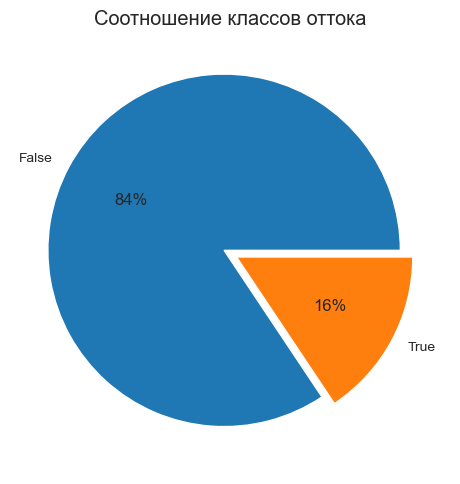

In [43]:
# строим диаграмму соотношения классов
plt.figure(figsize=(5, 5))
plt.pie(data['exited'].value_counts(), labels=['False', 'True'], 
        autopct='%.0f%%', explode=[0.04]*data['exited'].value_counts().size)
plt.title('Соотношение классов оттока');

In [44]:
# считаем количесво клиентов каждого класса
data.exited.value_counts().rename(index={1: 'True', 0: 'False'})

exited
False    5942
True     1101
Name: count, dtype: int64

Количество ушедших клиентов в процентном соотношении гораздо меньше, чем тех, кто продолжает пользоваться услугами. Баланс классов составляет примерно 1:6. Теперь перейдём к анализу признаков.

### begin_date и end_date

Данные признаки трудноинтерпертируемы для классификации клиентов, но мы можем исследовать длительность договора. По такому признаку будет легче понять зависимость с целевым признаком. Для этого вычислим дельту дат и запишем результат в новый столбец `duration_days`. Новый признак будет исчисляться в днях. Но так как в `end_date` есть пропуски, то сначала мы заполним их датой выгрузки данных. Также для удобства изменим тип данных нового признака на числовой.

In [45]:
data['end_date'].fillna(UPLOAD_DATE, inplace=True)
# вычисляем дилтельность по доступным датам
data['duration_days'] = data['end_date'] - data['begin_date']
# изменяем тип данных нового признака
data['duration_days'] = data['duration_days'].dt.days.astype('int')

# проверяем результат
data[['begin_date', 'end_date', 'duration_days']].head(10)

,begin_date,end_date,duration_days
0,2020-01-01,2020-02-01,31
1,2017-04-01,2020-02-01,1036
2,2019-10-01,2020-02-01,123
3,2016-05-01,2020-02-01,1371
4,2019-09-01,2020-02-01,153
5,2019-03-01,2020-02-01,337
6,2018-04-01,2020-02-01,671
7,2019-04-01,2020-02-01,306
8,2017-07-01,2020-02-01,945
9,2014-12-01,2017-05-01,882


Мы вычислили длительность договора для всех клиентов. Изучим распределение и описательные статистики признака.

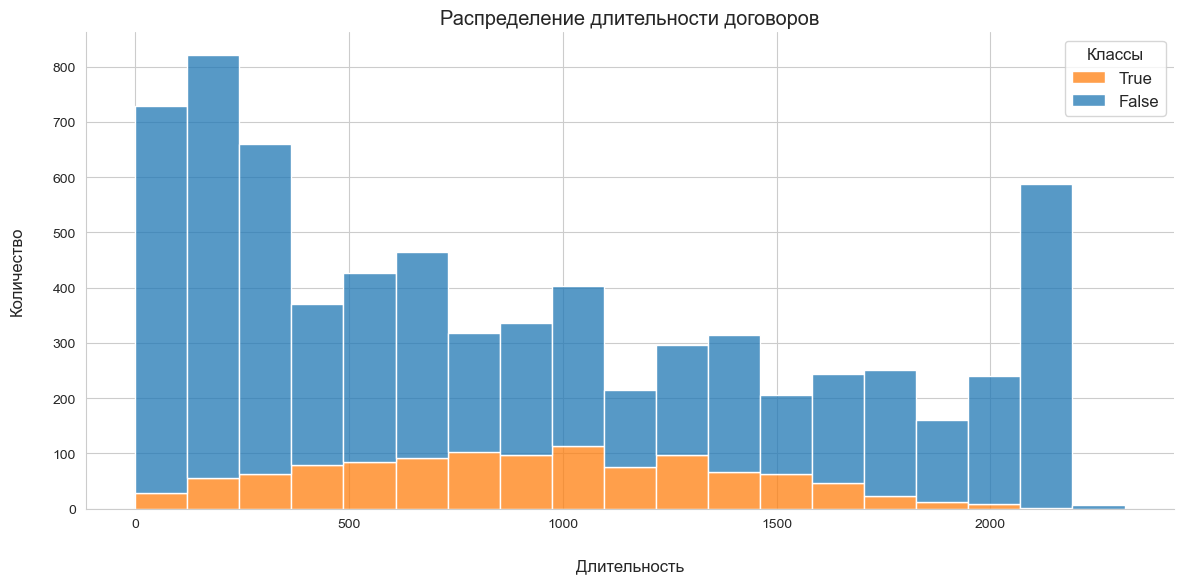

In [46]:
# строим гистограмму признака
sns.histplot(data=data, x='duration_days', hue='exited', multiple='stack')

# настраиваем график
plt.title('Распределение длительности договоров')
plt.xlabel('Длительность')
plt.ylabel('Количество')
plt.legend(title='Классы', labels=['True', 'False']);

In [47]:
# выводим статистики признака
data['duration_days'].describe()

count    7043.00
mean      898.56
std       683.13
min         0.00
25%       276.00
50%       761.00
75%      1461.00
max      2314.00
Name: duration_days, dtype: float64

Мы видим, что коротких договоров значительно больше, чем долгосрочных. С увеличением длительности договора, их количество уменьшается, но увеличивается количество ушедших клиентов. Затем количество спадает, после чего наблюдается резкий рост клиентов, которые продолжают пользоваться услугами. Если описать одним числом сколько времени клиент пользуется услугами компании, то это время займёт $761$ день или $2$ года.

Теперь попробуем посмотреть на длительность договора по годам в зависимости от класса. Для этого вычислим количество полных лет длительности договора и добавим в новый столбец `duration_years`.

In [48]:
# вычисляем длительность договора в полных годах 
data['duration_years'] = data['duration_days'] / 365
# округляем значения в меньшую сторону
data['duration_years'] = data['duration_years'].astype('int')

# проверяем результат
data[['duration_days', 'duration_years']].head(10)

,duration_days,duration_years
0,31,0
1,1036,2
2,123,0
3,1371,3
4,153,0
5,337,0
6,671,1
7,306,0
8,945,2
9,882,2


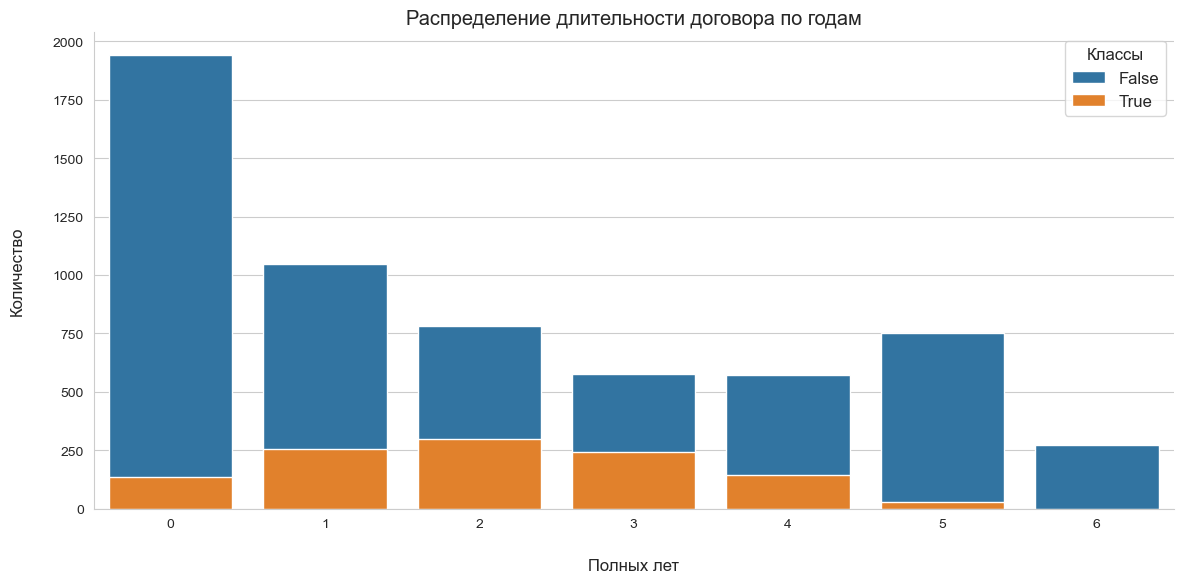

In [49]:
# строим распределение длительности по годам и классам
sns.countplot(data=data, x='duration_years', hue='exited', dodge=False)

# настраиваем график
plt.title('Распределение длительности договора по годам')
plt.xlabel('Полных лет')
plt.ylabel('Количество')
plt.legend(title='Классы', labels=['False', 'True'], loc='upper right');

Отток клиентов достигает своего пика на второй год пользования услугами. Основная же масса приходится на длительность $1-3$ года. Примечательно, что самые старые клиенты меньше задумываются об уходе. Посмотрим в каком соотношении находятся классы по годам. Для этого выведем свожную таблицу: рассчитаем количество клиентов каждого класса и долю ушедших для каждого года. 

In [50]:
# выводим сводную таблицу по длительности в годах
pivot_duration_years = data.pivot_table(index='duration_years', values='customer_id', columns='exited', aggfunc='count')
# перименовываем столбцы
pivot_duration_years.columns = ['false', 'true']
# считаем долю ушедших клиентов
pivot_duration_years['share'] = pivot_duration_years['true'] / pivot_duration_years['false']

# выводим результат
pivot_duration_years

,false,true,share
duration_years,,,
0,1942.0,133.0,0.07
1,1048.0,256.0,0.24
2,782.0,299.0,0.38
3,575.0,242.0,0.42
4,572.0,145.0,0.25
5,752.0,26.0,0.03
6,271.0,NaN,NaN


Начиная с первого года пользования услугами доля оттока начинает расти и достигает максимума на четвёртый год. Здесь почти половина клиентов отказывается от услуг компании. На четвёртый год, при общем количестве клиентов, доля оттока становится меньше, и на пятый год только $3\%$ клиентов покидают компанию.

### type

Договор на предоставление услуг имеет три типа длительности: месяц, год и два года. Рассмотрим общее распределение этих категорий в данных и то как они распределяются по классам.

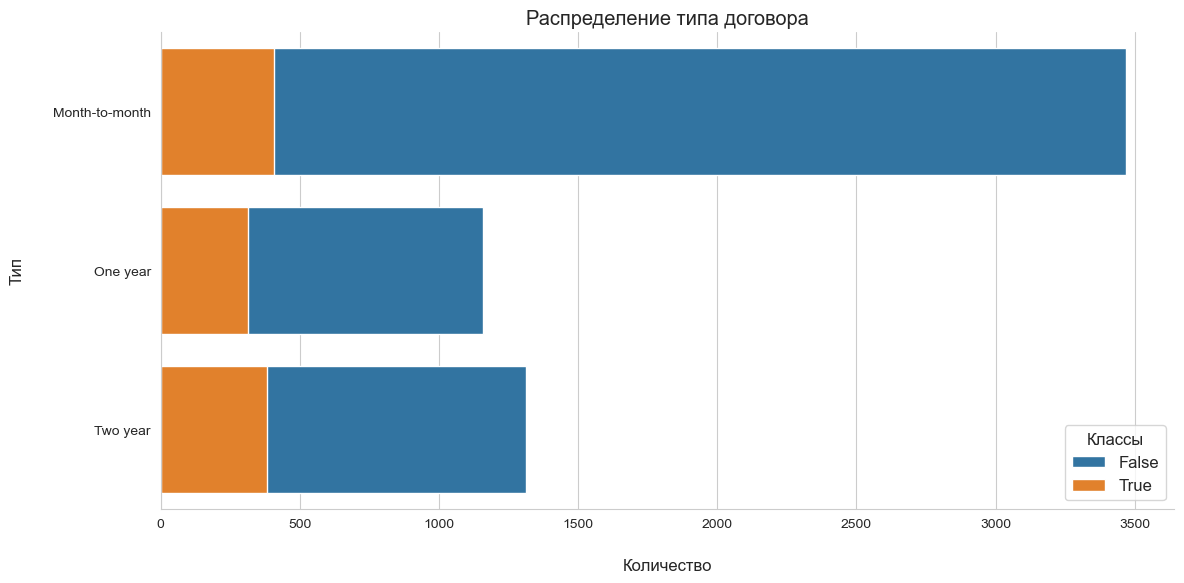

In [51]:
# строим график распределения типа договора по классам
sns.countplot(data=data, y='type', hue='exited', dodge=False)

# настраиваем график
plt.title('Распределение типа договора')
plt.xlabel('Количество')
plt.ylabel('Тип')
plt.legend(title='Классы', labels=['False', 'True'], loc='lower right');

In [52]:
# выводим сводную таблицу по количеству типов, распределённых по классам 
pivot_type = data.pivot_table(index='type', values='customer_id', columns='exited', aggfunc='count')
# перименовываем столбцы
pivot_type.columns = ['false', 'true']
# считаем долю ушедших клиентов
pivot_type['share'] = pivot_type['true'] / pivot_type['false']

# выводим результат
pivot_type

,false,true,share
type,,,
Month-to-month,3468,407,0.12
One year,1160,313,0.27
Two year,1314,381,0.29


Месячные договоры пользуются большой популярностью, их в три раза больше, чем готовых и двухлетник. Но перестают пользоваться услугами компании больше клиентов с догосрочными договорами. Доля покинувших составляет $30\%$, то есть каждый третий.

### paperless_billing

Услуга предоставления электронного чека. Принимает два значения – `Yes` или `No`. Рассмотрим распределение признака по классам клиентов.

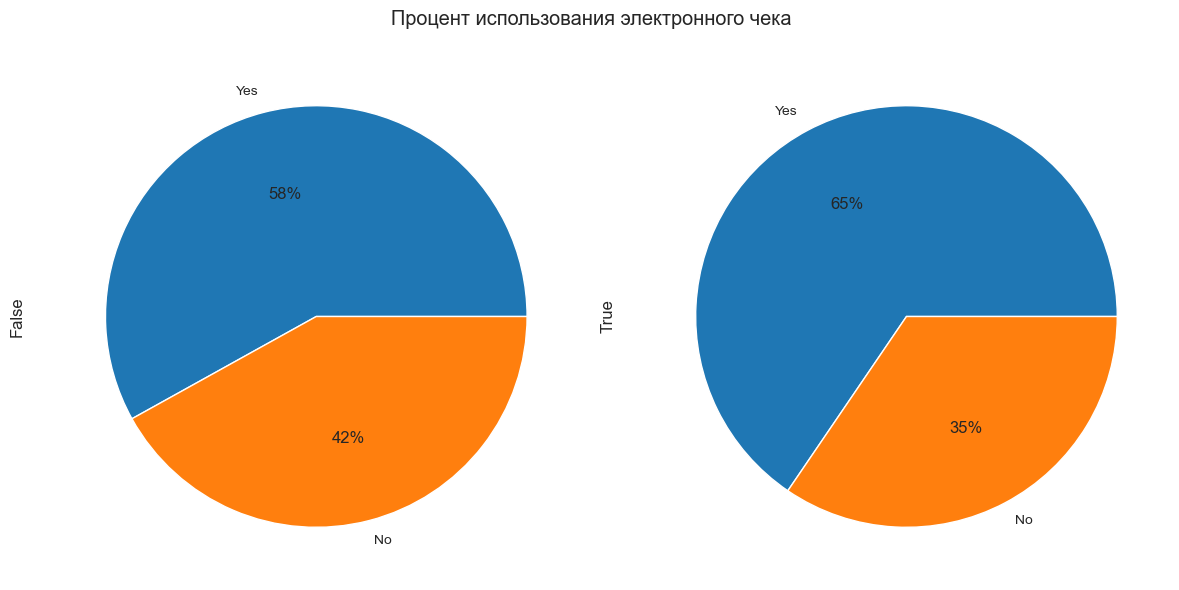

In [53]:
# создаём общую фигуру шрафиков
fig, ax = plt.subplots(1, 2)
plt.suptitle('Процент использования электронного чека')

# строим круговые диаграммы классов
data.query('exited == 0')['paperless_billing'].value_counts().plot(kind='pie', autopct='%.0f%%', ax=ax[0])
data.query('exited == 1')['paperless_billing'].value_counts().plot(kind='pie', autopct='%.0f%%', ax=ax[1])

# настраиваем графики
ax[0].set(ylabel='False')
ax[1].set(ylabel='True');

In [54]:
# выводим сводную таблицу по признаку, распределённого по классам 
pivot_billing = data.pivot_table(index='paperless_billing', values='customer_id', columns='exited', aggfunc='count')
# перименовываем столбцы
pivot_billing.columns = ['false', 'true']
# считаем долю ушедших клиентов
pivot_billing['share'] = pivot_billing['true'] / pivot_billing['false']

# выводим результат
pivot_billing

,false,true,share
paperless_billing,,,
No,2492,380,0.15
Yes,3450,721,0.21


Доли ушедших клиентов, среди тех, кто использовал электронный чек, имеет небольшую разницу в $6\%$ с теми, кто не использовал. Похоже, что наличие электронного чека не сильно влияет на уход клиента.

### payment_method

Способ оплаты имеет четыре различных категории: 

- оповещение по почте; 
- электронное оповещение;
- автоматическое списание средств с кредитной карты;
- автоматическое списание средст с банковского счёта.

Данные категории можно рассматривать как две группы: автоматические способы оплаты и оповещения об оплате. Далее мы попробуем это использовать.

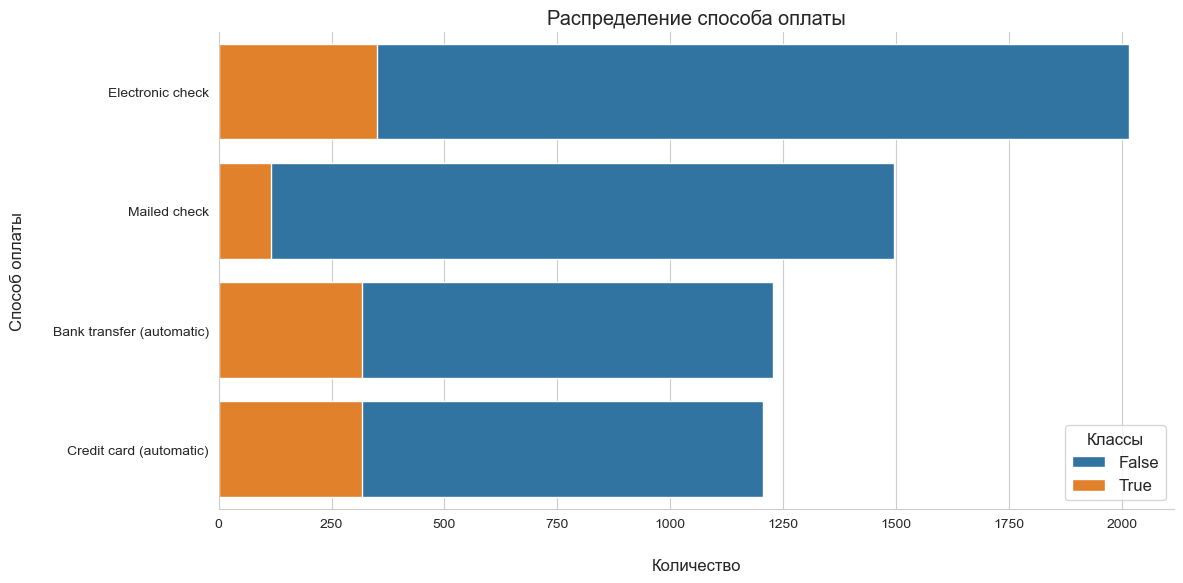

In [55]:
# строим график распределения типа договора по классам
sns.countplot(data=data, y='payment_method', hue='exited', dodge=False)

# настраиваем график
plt.title('Распределение способа оплаты')
plt.xlabel('Количество')
plt.ylabel('Способ оплаты')
plt.legend(title='Классы', labels=['False', 'True'], loc='lower right');

In [56]:
# выводим сводную таблицу по способу оплаты, распределённого по классам 
pivot_payment = data.pivot_table(index='payment_method', values='customer_id', columns='exited', aggfunc='count')
# перименовываем столбцы
pivot_payment.columns = ['false', 'true']
# считаем долю ушедших клиентов
pivot_payment['share'] = pivot_payment['true'] / pivot_payment['false']

# выводим результат
pivot_payment

,false,true,share
payment_method,,,
Bank transfer (automatic),1227,317,0.26
Credit card (automatic),1205,317,0.26
Electronic check,2015,350,0.17
Mailed check,1495,117,0.08


Доля ушедших клиентов довольно высока у тех, кто пользовался автоматическим списанием средств, по $26\%$ каждая категория. Самый популярный способ оплаты это электронное оповещение. Самая маленькая доля ушедших клиентов – у категории почтового оповещения.

Попробуем объединить категории в две группы и посмотреть как изменится отток клиентов в каждой. Используем самописную функцию `automatic_payment`, которая присвоит новую категорию на основе имеющихся. 

In [57]:
# создаём новую категорию с помощью написанной функции
data['automatic_payment'] = data['payment_method'].apply(automatic_payment)
# проверяем результат
data[['payment_method', 'automatic_payment']].head(10)

,payment_method,automatic_payment
0,Electronic check,No
1,Mailed check,No
2,Mailed check,No
3,Bank transfer (automatic),Yes
4,Electronic check,No
5,Electronic check,No
6,Credit card (automatic),Yes
7,Mailed check,No
8,Electronic check,No
9,Bank transfer (automatic),Yes


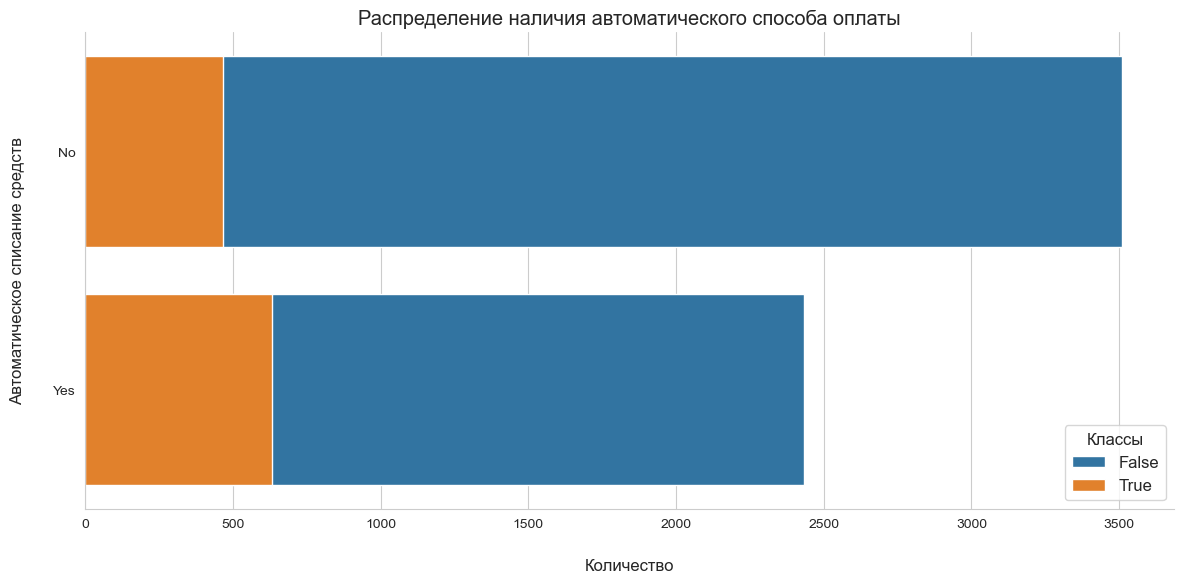

In [58]:
# строим график распределения типа договора по классам
sns.countplot(data=data, y='automatic_payment', hue='exited', dodge=False)

# настраиваем график
plt.title('Распределение наличия автоматического способа оплаты')
plt.xlabel('Количество')
plt.ylabel('Автоматическое списание средств')
plt.legend(title='Классы', labels=['False', 'True'], loc='lower right');

In [59]:
# выводим сводную таблицу по новому признаку, распределённого по классам 
pivot_payment_auto = data.pivot_table(index='automatic_payment', values='customer_id', columns='exited', aggfunc='count')
# перименовываем столбцы
pivot_payment_auto.columns = ['false', 'true']
# считаем долю ушедших клиентов
pivot_payment_auto['share'] = pivot_payment_auto['true'] / pivot_payment_auto['false']

# выводим результат
pivot_payment_auto

,false,true,share
automatic_payment,,,
No,3510,467,0.13
Yes,2432,634,0.26


Ситуация не изменилась. Доля ушедших клиентов по прежнему высока у тех, кто использовал автоматическое списание средств. При этом она в два раза выше тех, кто использовал оповещения. Популярность последних остается прежней.

### monthly_charges и total_charges

Ежемесячные траты и сколько всего было потрачено на услуги за всё время. Рассмотрим распределение обоих признаков с учётом классов и общие описательные статистики.

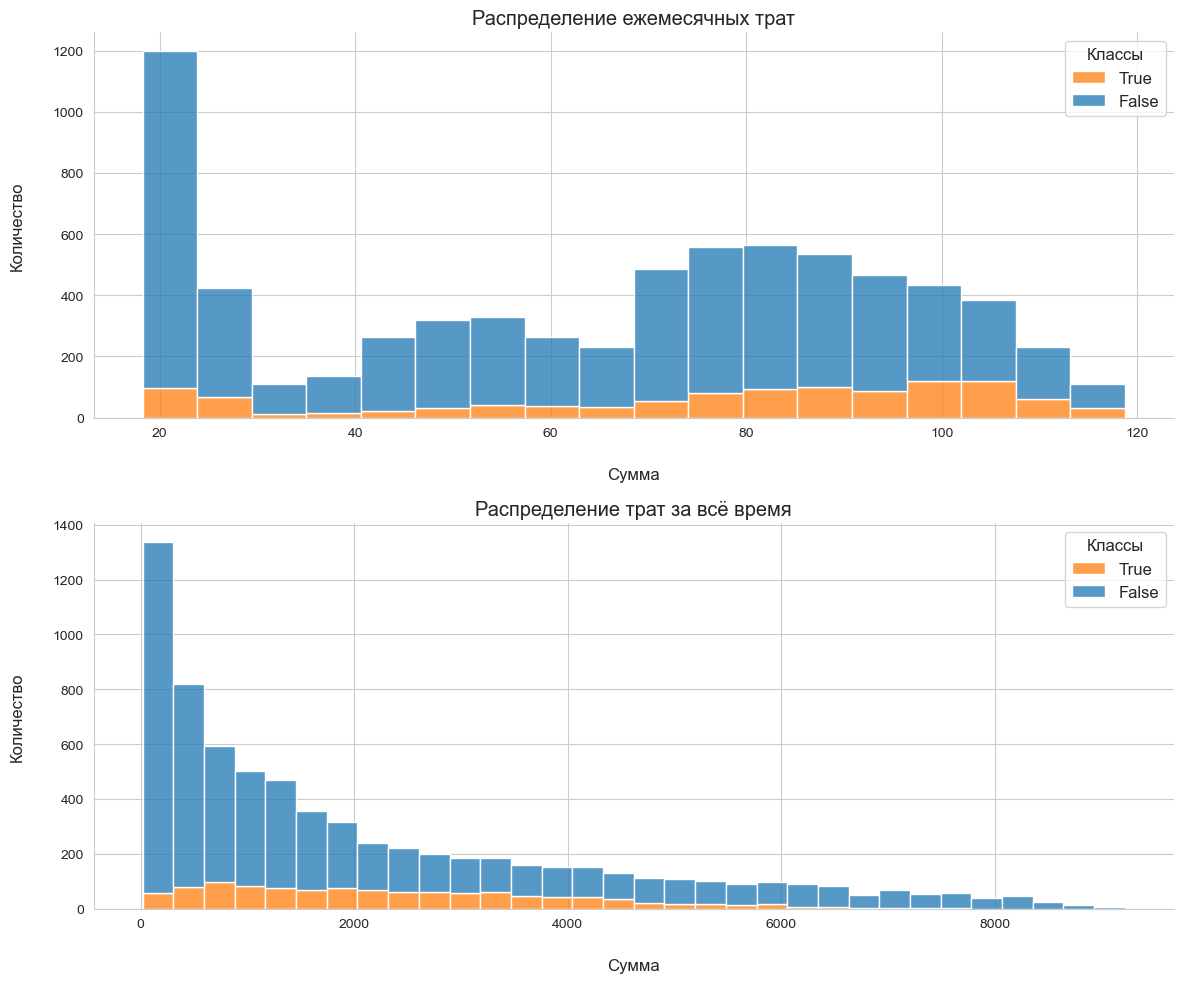

In [60]:
#  создаём общую фигуру для графиков
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# строим распределения признаков
sns.histplot(data=data, x='monthly_charges', hue='exited', multiple='stack', ax=ax[0])
sns.histplot(data=data, x='total_charges', hue='exited', multiple='stack', ax=ax[1])

# настраиваем графики
ax[0].set(title='Распределение ежемесячных трат', xlabel='Сумма', ylabel='Количество')
ax[0].legend(title='Классы', labels=['True', 'False'])
ax[1].set(title='Распределение трат за всё время', xlabel='Сумма', ylabel='Количество')
ax[1].legend(title='Классы', labels=['True', 'False']);

In [61]:
# выводим описательные статистики трат
pd.concat([data['monthly_charges'].describe(), data['total_charges'].describe()], axis=1)

,monthly_charges,total_charges
count,7043.00,7043.00
mean,64.76,2115.38
std,30.09,2112.68
min,18.25,19.05
25%,35.50,436.75
50%,70.35,1343.35
75%,89.85,3236.69
max,118.75,9221.38


Распределение ежемесячных трат выглядит мультимодально. Чаще всего клиенты тратят около $25$ условных единиц. Также большие скопления значений находятся в районе $80$ и $50$. Распределение ежемесячных трат ушедших клиентов повторяет распределение за исключением значений от $100$. Там отток увеличивается, в то время, как общее количество снижается.

Распределение трат за всё время начинается с высоких значений и резко уходит на спад на всём диапазоне значений. Отток клиентов уже появляется на минимальных значениях признака и, набрав максимальную частоту, постепенно идёт на спад, вместе с общим распределением. Основной отток клиентов происходит на первую набежавшую $1000$.

Глядя на распределения данных признаков можно сделать следующий вывод: более явная взаимосвязь наблюдается у `monthly_charges`. Тут с определённых значений отток значительно увеличивается. Что же касается `total_charges`, то основной отток приходится на медианное значение – $1300$. Но, если учесть долю ушедших, то при визуальной оценке кажется, что она сильно не меняется на протяжении всего диапазона значений.

### gender, senior_citizen, partner, dependents

Рассмотрим пол, статус пенсионера, семейное положение и наличие иждевенцев одновременно, так как данные признаки составляют портрет клиента компании. 

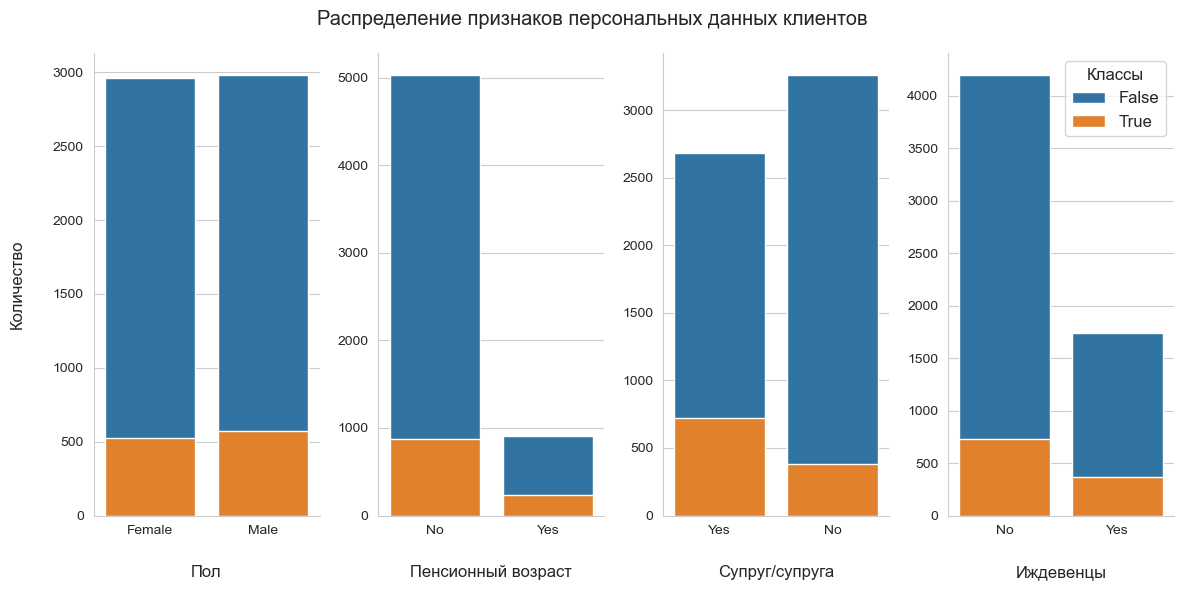

In [62]:
# создаём общую фигуру для графиков
fig, ax = plt.subplots(1, 4)
plt.suptitle('Распределение признаков персональных данных клиентов')

# циклом проходим по признакам
for i, col in enumerate(data.columns[8:12]):
    # строим график для признака
    sns.countplot(data=data, x=col, hue='exited', dodge=False, ax=ax[i])

# настраиваем первый график    
ax[0].set(xlabel='Пол', ylabel='Количество')
ax[0].legend([],[], frameon=False)
# настраиваем второй график
ax[1].set(xlabel='Пенсионный возраст', ylabel='')
ax[1].legend([],[], frameon=False)
# настраиваем третий график
ax[2].set(xlabel='Супруг/супруга', ylabel='')
ax[2].legend([],[], frameon=False)
# настраиваем четвёртый график
ax[3].set(xlabel='Иждевенцы', ylabel='')
ax[3].legend(title='Классы', labels=['False', 'True']);

In [63]:
# проходим циклом по признакам
for col in data.columns[8:12]:
    # выводим сводную таблицу по признаку, распределённого по классам 
    pivot = data.pivot_table(index=col, values='customer_id', columns='exited', aggfunc='count')
    # перименовываем столбцы
    pivot.columns = ['false', 'true']
    # считаем долю ушедших клиентов
    pivot['share'] = pivot['true'] / pivot['false']

    # выводим результат
    display(pivot)

,false,true,share
gender,,,
Female,2960,528,0.18
Male,2982,573,0.19


,false,true,share
senior_citizen,,,
No,5032,869,0.17
Yes,910,232,0.25


,false,true,share
partner,,,
No,3259,382,0.12
Yes,2683,719,0.27


,false,true,share
dependents,,,
No,4200,733,0.17
Yes,1742,368,0.21


Глядя на грфики и сводные таблицы, можно сделать следующий вывод:

- отток клиентов не зависит от пола клиента. Среди женщин и мужчин одинаковая доля ушедших. Общее количество полов также равно;
- значительное число клиентов компании – пользователи, не вступившие в пенсионный возраст. Пенсионеры составляют седьмую часть выборки. Разница в доли ушедших в двух возрастных категориях $7\%$ – среди пенсионеров от услуг компании отказалась четверть, в то время как у другой категории – $17\%$;
- из рассматриваемых признаков больше всего влияет на отток наличие супруга/супруги. Треть замужних перестали пользоваться услугами и только десятая часть – не имеющих партнёра;
- наличие иждивенцев не сильно влияет на решение отказаться от услуг компании. Разница между категориями вссего $4\%$. 

### internet_service и multiple_lines

Рассмотрим тип подключения и наличие многоканальной линии. Это две основные услуги, которые предоставляет компания. Тип подключения дает клиентам выход в сеть Интернет, и имеет два категориальных значения. Наличие многоканальной линии подразумевает, что клиент, имея стационарный телефон, может подключить к нему такую опцию. Напомним, что В данных признаках есть ещё категория `Not used`, которую мы ввели при объединении данных. Наличие этой категории говорит нам о том, что основной услугой клиент не пользовался. 

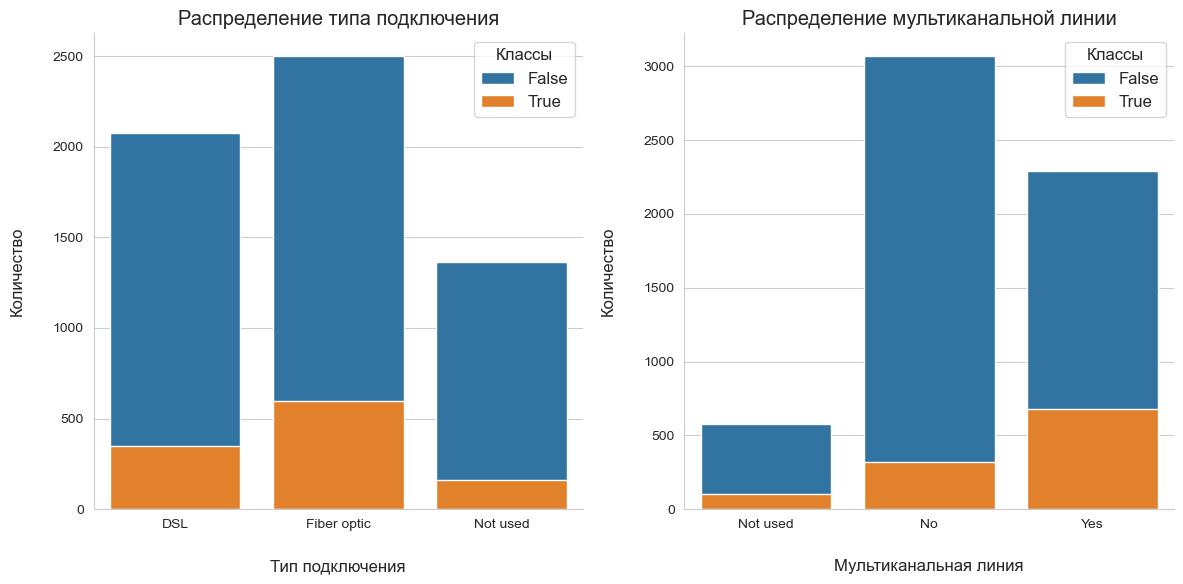

In [64]:
# создаём общую фигуру
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# строим графики распределения категорий 
sns.countplot(data=data, x='internet_service', hue='exited', dodge=False, ax=ax[0])
sns.countplot(data=data, x='multiple_lines', hue='exited', dodge=False, ax=ax[1])

# настраиваем графики
ax[0].set(title='Распределение типа подключения', xlabel='Тип подключения', ylabel='Количество')
ax[0].legend(title='Классы', labels=['False', 'True'])
ax[1].set(title='Распределение мультиканальной линии', xlabel='Мультиканальная линия', ylabel='Количество')
ax[1].legend(title='Классы', labels=['False', 'True']);

In [65]:
#  проходим циклом по признакам
for col in ['internet_service', 'multiple_lines']:
    # выводим сводную таблицу по новому признаку, распределённого по классам 
    pivot = data.pivot_table(index=col, values='customer_id', columns='exited', aggfunc='count')
    # перименовываем столбцы
    pivot.columns = ['false', 'true']
    # считаем долю ушедших клиентов
    pivot['share'] = pivot['true'] / pivot['false']

    # выводим результат
    display(pivot)

,false,true,share
internet_service,,,
DSL,2075,346,0.17
Fiber optic,2501,595,0.24
Not used,1366,160,0.12


,false,true,share
multiple_lines,,,
No,3070,320,0.10
Not used,579,103,0.18
Yes,2293,678,0.30


Больше всего клиентов отказываются от предоставления услуг компании при наличии подключении оптоволокна и многоканального телефона. Доля ушедших в этих категориях – от пятой чатси до четверти клиентов. Те, кто пользовался только стационарным телефоном – меньше всего задумывались о расторжении договора с компанией.

### online_security, online_backup, device_protection и tech_support

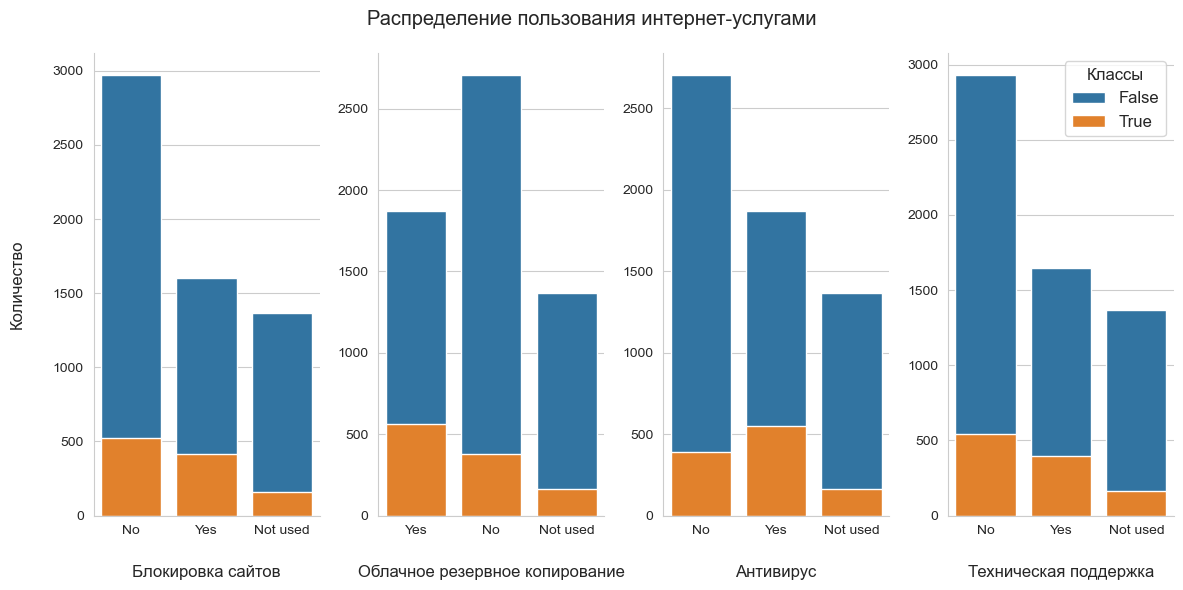

In [66]:
# создаём общую фигуру для графиков
fig, ax = plt.subplots(1, 4)
plt.suptitle('Распределение пользования интернет-услугами')

# циклом проходим по признакам
for i, col in enumerate(data.columns[13:17]):
    # строим график для признака
    sns.countplot(data=data, x=col, hue='exited', dodge=False, ax=ax[i])

# настраиваем первый график    
ax[0].set(xlabel='Блокировка сайтов', ylabel='Количество')
ax[0].legend([],[], frameon=False)
# настраиваем второй график
ax[1].set(xlabel='Облачное резервное копирование', ylabel='')
ax[1].legend([],[], frameon=False)
# настраиваем третий график
ax[2].set(xlabel='Антивирус', ylabel='')
ax[2].legend([],[], frameon=False)
# настраиваем четвёртый график
ax[3].set(xlabel='Техническая поддержка', ylabel='')
ax[3].legend(title='Классы', labels=['False', 'True']);

In [67]:
# проходим циклом по признакам
for col in data.columns[13:17]:
    # выводим сводную таблицу по признаку, распределённого по классам 
    pivot = data.pivot_table(index=col, values='customer_id', columns='exited', aggfunc='count')
    # перименовываем столбцы
    pivot.columns = ['false', 'true']
    # считаем долю ушедших клиентов
    pivot['share'] = pivot['true'] / pivot['false']

    # выводим результат
    display(pivot)

,false,true,share
online_security,,,
No,2972,526,0.18
Not used,1366,160,0.12
Yes,1604,415,0.26


,false,true,share
online_backup,,,
No,2707,381,0.14
Not used,1366,160,0.12
Yes,1869,560,0.30


,false,true,share
device_protection,,,
No,2704,391,0.14
Not used,1366,160,0.12
Yes,1872,550,0.29


,false,true,share
tech_support,,,
No,2930,543,0.19
Not used,1366,160,0.12
Yes,1646,398,0.24


Чаще всего покидали компанию те, кто использовал что либо из представленных услуг. Во всех признаках доля ушедших составляет от четверти до трети клиентов. Разница в оттоке между теми кто пользовался этими услугами и не пользоався составляет в среднем $11\%$. Меньше всего оттока наблюдается в той категории клиентов, которые не пользовались интернет-услугами полностью, то есть были без подключения. Чаще всего люди имели какое-либо подключение без дополнительных интернет-услуг.   

### streaming_tv и streaming_movies

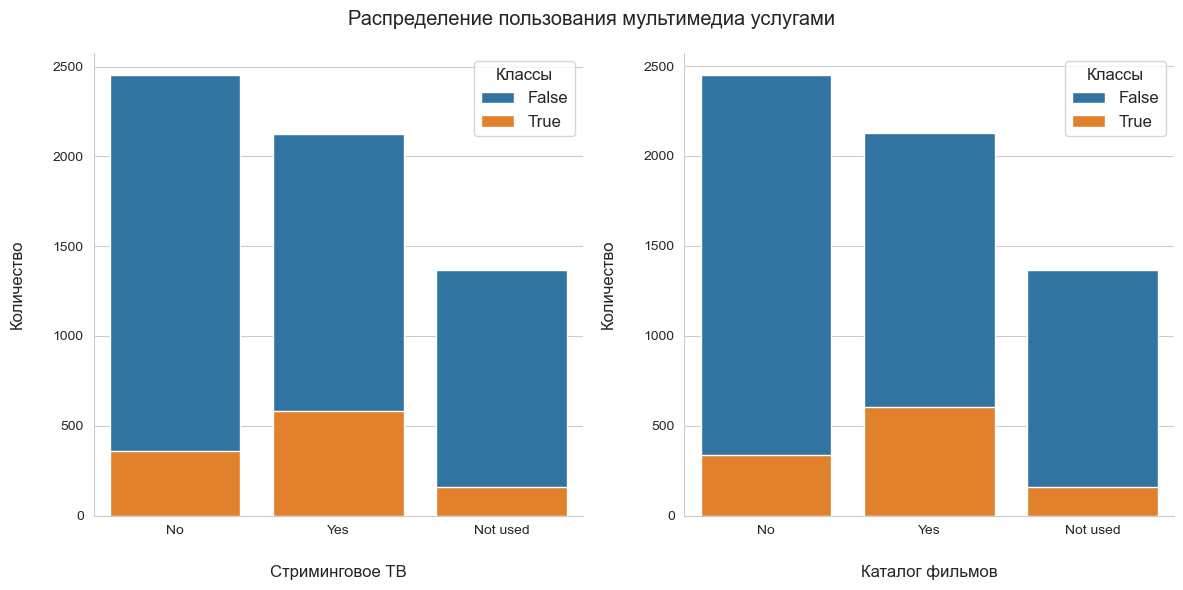

In [68]:
# создаём общую фигуру
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Распределение пользования мультимедиа услугами')

# строим графики распределения категорий 
sns.countplot(data=data, x='streaming_tv', hue='exited', dodge=False, ax=ax[0])
sns.countplot(data=data, x='streaming_movies', hue='exited', dodge=False, ax=ax[1])

# настраиваем графики
ax[0].set(xlabel='Стриминговое ТВ', ylabel='Количество')
ax[0].legend(title='Классы', labels=['False', 'True'])
ax[1].set(xlabel='Каталог фильмов', ylabel='Количество')
ax[1].legend(title='Классы', labels=['False', 'True']);

In [69]:
# проходим циклом по признакам
for col in ['streaming_tv', 'streaming_movies']:
    # выводим сводную таблицу по признаку, распределённого по классам 
    pivot = data.pivot_table(index=col, values='customer_id', columns='exited', aggfunc='count')
    # перименовываем столбцы
    pivot.columns = ['false', 'true']
    # считаем долю ушедших клиентов
    pivot['share'] = pivot['true'] / pivot['false']

    # выводим результат
    display(pivot)

,false,true,share
streaming_tv,,,
No,2453,357,0.15
Not used,1366,160,0.12
Yes,2123,584,0.28


,false,true,share
streaming_movies,,,
No,2450,335,0.14
Not used,1366,160,0.12
Yes,2126,606,0.29


Примерно одинаковое количество клиентов использовало стриминговое ТВ и каталог фильмов. В этой же категории высокая доля оттока – треть пользователей, которые использовали данные виды интернет-услуг в дальнейшем расторгнули договор с компанией. Разница с теми, кто не пользовался мультимедиа составляет в среднем $14\%$.

### Количество подключённых интернет-услуг

Посчитаем сколько было подключённых услуг у каждого пользователя и посмотрим как меняется отток в зависимости от количества. Создадим новый столбец `count_service` и запишем в него результаты подсчёта, используя самописную функцию `count_services`. 

In [70]:
# считаем корличество сервисов
data['count_services'] = data.apply(count_services, axis=1)

# проверяем результат
data.iloc[:10, 13:]

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,exited,duration_days,duration_years,automatic_payment,count_services
0,No,Yes,No,No,No,No,Not used,0,31,0,No,1
1,Yes,No,Yes,No,No,No,No,0,1036,2,No,2
2,Yes,Yes,No,No,No,No,No,0,123,0,No,2
3,Yes,No,Yes,Yes,No,No,Not used,0,1371,3,Yes,3
4,No,No,No,No,No,No,No,0,153,0,No,0
5,No,No,Yes,No,Yes,Yes,Yes,0,337,0,No,3
6,No,Yes,No,No,Yes,No,Yes,0,671,1,Yes,2
7,Yes,No,No,No,No,No,Not used,0,306,0,No,1
8,No,No,Yes,Yes,Yes,Yes,Yes,0,945,2,No,4
9,Yes,Yes,No,No,No,No,No,1,882,2,Yes,2


Функция отработала корректно. Теперь проианлизируем результаты.

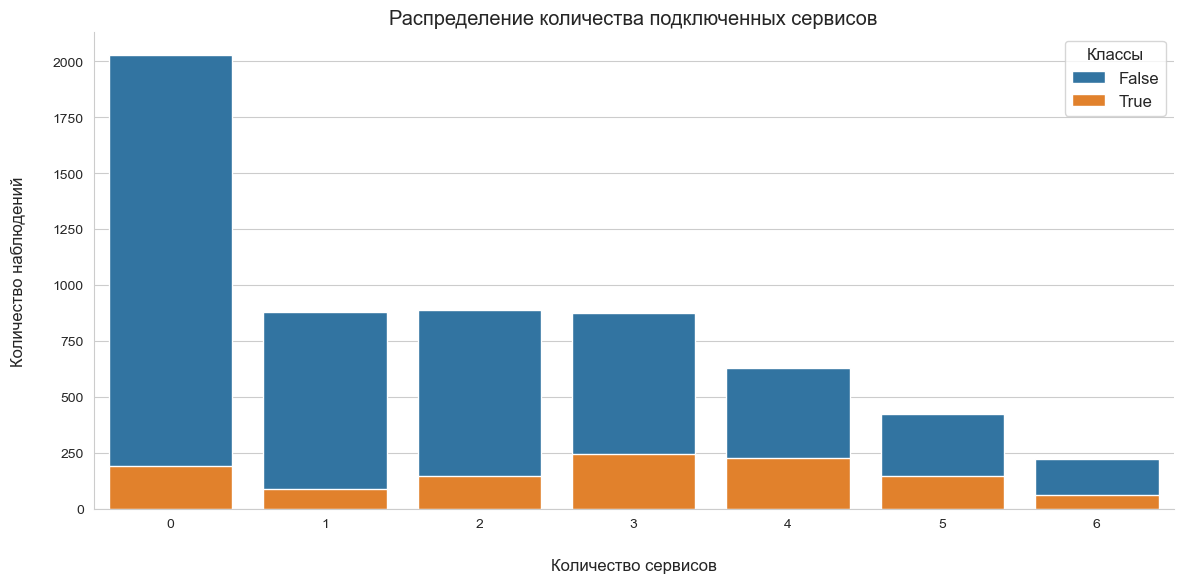

In [71]:
# строим распределение длительности по годам и классам
sns.countplot(data=data, x='count_services', hue='exited', dodge=False)

# настраиваем график
plt.title('Распределение количества подключенных сервисов')
plt.xlabel('Количество сервисов')
plt.ylabel('Количество наблюдений')
plt.legend(title='Классы', labels=['False', 'True'], loc='upper right');

In [72]:
# выводим сводную таблицу по длительности в годах
pivot_services = data.pivot_table(index='count_services', values='customer_id', columns='exited', aggfunc='count')
# перименовываем столбцы
pivot_services.columns = ['false', 'true']
# считаем долю ушедших клиентов
pivot_services['share'] = pivot_services['true'] / pivot_services['false']

# выводим результат
pivot_services

,false,true,share
count_services,,,
0,2028,191,0.09
1,877,89,0.10
2,889,144,0.16
3,875,243,0.28
4,627,225,0.36
5,424,147,0.35
6,222,62,0.28


Анализируя полученные результаты, мы видим, что с ростом подключенных сервисов доля ушедших клиентов возрастает. И только немного уменьшается при максимуме подключенных услуг. Изменения от максимума – $8\%$.

### Корреляционный анализ

Теперь проведём корреляционный анализ. Рассмотрим взаимосвязь признаков между собой. Здесь важно выявить признаки, которые имеют слишков высокую корреляцию с другими признаками так как они могут быть избыточными или приводить к переобучению модели.

Мы воспользуемся инструментарием, который способен выявить не только линейную зависимость, но и нелинейную. Из анализа следует исключить идентификационный номер клиента `customer_id`, так как он не несёт полезной информации на данном этапе.

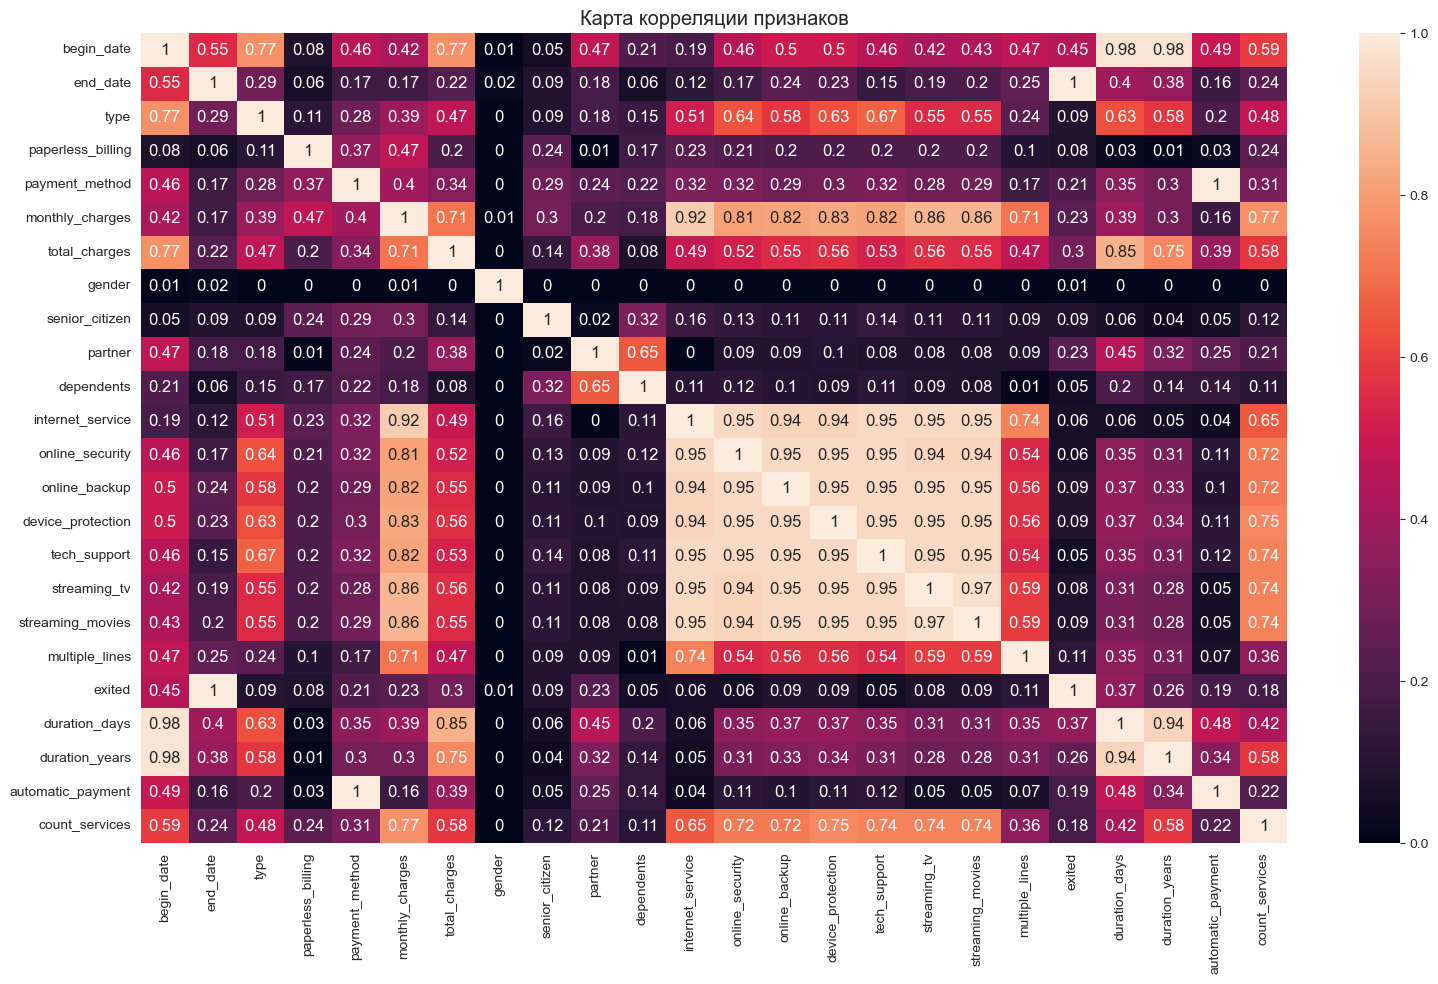

In [73]:
# выделяем числовые признаки
interval_cols = data.select_dtypes(include=['int', 'float']).columns
# строим корреляционную матрицу
phik_overview = data.drop(columns='customer_id').phik_matrix(interval_cols).round(2)

# создаём фигуру
plt.figure(figsize=(16, 10))
# строим теловую карту корреляций
sns.heatmap(phik_overview, annot=True)
plt.title('Карта корреляции признаков');

Для интерпретации корреляционной матрицы мы будем использовать следующие правила:

- Если коэффициент равен $0$, то признаки независимы;
- Если коэффициент равен $1$, то признаки полностью зависимы.
- Если коэффициент лежит между $0$ и $1$, то признаки имеют некоторую степень зависимости.

Для качественной оценки корреляции мы воспользуемся [шкалой Чеддока](https://math.semestr.ru/corel/cheddok.php), где корреляция в зависимости от коэффициента может быть:

- $0,1-0,3$ — Слабая;
- $0,3-0,5$ — Умеренная;
- $0,5-0,7$ — Заметная;
- $0,7-0,9$ — Высокая;
- $0,9-0,99$ — Весьма высокая.

Итак. В тепловой карте корреляций сразу бросается в глаза:

- диагональ из единиц, идущая от левого верхнего угла в правый нижной. Это диагональ признаков, коррелирующих с самими собой. На неё не стоит обращать внимание;
- большой остров с весьма высокими корреляциями. Здесь расположены все интернет-услуги, и они сильно коррелируют между собой. 
- весьма высокая корреляция наблюдается у `duration_days` и `duration_years` c `begin_date`. Это ожидаемо, потому что дата начала предоставления услуг была использован для генерации длительностей;
- полностью зависимыми являются признаки `payment_method` с `automatic_payment` и `end_date` с `exited`. В обоих случаях первый признак стал основой для генерации второго;
- `montly_charges` и `internet_service` создают весьма высокую связь: тип подключения явно влияет на ежемесячный платёж за услуги;
- `gender` полностью независимый признак от других. Его корреляция равна нулю или стремится к нулю по всем признакам.

### Вывод

На этапе предобработки данных мы объединили все таблицы в одну, при этом у нас возникли пропуски значений в некоторых признаках из-за того, что некоторые таблицы содержат не полный список идентификационных номеров клиентов, по которым объединялись таблицы.

Мы изменили имена столбцов согласно хорошему стилю написания. Также мы скорректировали типы данных некоторых признаков: даты перевели в `datetime`, числовые признаки – во `float`. В тех признаках, где присутствовали смешанные типы данных (строковые значения), неподходящие значения мы заменили на пропуски.

Проущенные значения, возникшие при объединении таблиц, мы заменили подходящим значением-заглушкой. Пропуски в `total_charges` мы заменили значением из `monthly_charges`, так как они появились в результате выгрузки данных. На тот момент `total_charges` не был ещё расчитан для клиентов.

Также у нас были пропуски в `end_date` у тех клиентов, которые продолжали пользоваться услугами компании на момент выгрузки данных. Данные пропуски мы заполнили датой выгрузки данных, чтобы рассчитать длительность договора, а также выделить целевой признак `exited`.

Анализируя данные нам удалось выяснить следующее:

- соотношение классов в данных составляет $1:6$ — $16\%$ расторгнувших договор, $84\%$ продолжающих пользоваться услугами компании;
- с увеличением длительности договора, отток клиентов также увеличивается. Затем он падает, в то время как общее количество договоров снижается на протяжении всего диапазона;
- максимальный отток клиентов приходится на второй-третий год договора. Самые старые клиенты меньше всех задумываются о расторжении.
- месячные договоры пользуются большей популярностью, но большая доля ушедших приходится на долгосрочные договоры;
- наличие электронного чего не сильно влияет на уход клиента;
- доля ушедших клиентов довольно высока у тех, кто пользовался автоматическим списанием средств. Самый популярный способ оплаты это электронное оповещение. Самая маленькая доля ушедших клиентов – у категории почтового оповещения;
- ушедшие люди чаще всего платили около $100$ условных единиц за услуги компании, в то время как общая сумма трат достигала $1000$.
- пол клиента не являет на отток. Среди жнещин и мужчин одинаковая доля ушедших, как общее количество наблюдений;
- значительное число клиентов — люди, не вошедшие в пенсионный возраст. Если сравнивать доли категорий, то чаще уходят пенсионеры, люди в браке, с иждевенцами;
- от услуг компании больше отказывались клиенты с оптоволокном и многоканальным телефоном. Меньше всего – имеюще только стационарный телефон;
- наличие дополнительных интернет-услуг характерно для ушедшего клиента. 
- с количеством подключённых услуг растёт и количество ушедших клиентов.

Корреляционный анализ выявил следующие зависимости:
- интернет-услуги весьма сильно коррелируют между собой;
- весьма высокая корреляция наблюдается у `duration_days` и `duration_years` c `begin_date`;
- полностью зависимыми являются признаки `payment_method` с `automatic_payment` и `end_date` с `exited`;
- `montly_charges` и `internet_service` создают весьма высокую связь. Тип подключения явно влияет на ежемесячный платёж за услуги;

На эти признаки в дальнейшем следует обратить внимание.

## Подготовка признаков

На этом этапе мы должны выделить целевой признак, разделить данные на обучающую и тестовую выборки. Также необходимо удалить малоинформативные признаки и, по возможности, добавить новые. После чего мы проведём нормирование и кодирование значений для предстоящего моделирования.

Сперва удалим ненужные и малоинформативные признаки. Такими являются идентификационный номер клиента и даты.

In [74]:
# удаляем ненужные признаки
data.drop(columns=['customer_id', 'begin_date', 'end_date'], inplace=True)

# проверяем реузльтат
data.columns

Index(['type', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines', 'exited', 'duration_days', 'duration_years',
       'automatic_payment', 'count_services'],
      dtype='object')

Теперь удалим признаки, которые имеют высокую корреляцию с другими признаками. Для этого установим порог корреляции, выше которого будут такие признаки. Выведем их отдельный список, чтобы затем удалить из данных.

In [75]:
# устанавливаем порог
threshold = .8
# создаём новую матрицу корреляций
corr_matrix = data.phik_matrix(interval_cols).round(2)
# фильруем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# создаём список коллинеарных признаков 
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# выводим матрицу корреляций
display(corr_matrix[to_drop].style.highlight_between(left=.8, right=1, color='orange'))
# выводим список коллинеарных признаков
to_drop

,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,duration_days,duration_years,automatic_payment
type,0.510000,0.640000,0.580000,0.630000,0.670000,0.550000,0.550000,0.630000,0.580000,0.200000
paperless_billing,0.230000,0.210000,0.200000,0.200000,0.200000,0.200000,0.200000,0.030000,0.010000,0.030000
payment_method,0.320000,0.320000,0.290000,0.300000,0.320000,0.280000,0.290000,0.350000,0.300000,1.000000
monthly_charges,0.920000,0.810000,0.820000,0.830000,0.820000,0.860000,0.860000,0.390000,0.300000,0.160000
total_charges,0.490000,0.520000,0.550000,0.560000,0.530000,0.560000,0.550000,0.850000,0.750000,0.390000
gender,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
senior_citizen,0.160000,0.130000,0.110000,0.110000,0.140000,0.110000,0.110000,0.060000,0.040000,0.050000
partner,0.000000,0.090000,0.090000,0.100000,0.080000,0.080000,0.080000,0.450000,0.320000,0.250000
dependents,0.110000,0.120000,0.100000,0.090000,0.110000,0.090000,0.080000,0.200000,0.140000,0.140000
internet_service,1.000000,0.950000,0.940000,0.940000,0.950000,0.950000,0.950000,0.060000,0.050000,0.040000


['internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'duration_days',
 'duration_years',
 'automatic_payment']

Проанализируем результаты. Важно: в столбцах указаны коллинеарные признаки.

- `internet_service` коррелирует с `monthly_charges`, с самим собой и со всеми дополнительными интернет-услугами. Что-то из этого придётся удалить;
- все дополнительные услуги коррелируют между собой, а также с `monthly_charges`. Если мы оставим ежемесячные траты, то дополнительные услуги надо удалить. Полностью эти данные мы не потеряем, так как есть `count_services`, который описывает количество этих услуг;
- `duration_days` коррелирует с `total_charges` и с `duration_years`. Что-то из этого также придётся удалить;
- `duration_years`, соответственно, коррелирует с `duration_days`. Один из двух признаков надо удалить;
- `automatic_payment` коррелирует с самим собой и с `payment_method`. Аналогично.

Чтобы определиться какие из этих признаков будут удалены, сравним их корреляции ко всему набору признаков.

In [76]:
# выводим корреляционную матрицу рассматриваемых признаков
corr_matrix[['internet_service', 'monthly_charges']].style.highlight_max(axis=1, color='orange')

,internet_service,monthly_charges
type,0.510000,0.390000
paperless_billing,0.230000,0.470000
payment_method,0.320000,0.400000
monthly_charges,0.920000,1.000000
total_charges,0.490000,0.710000
gender,0.000000,0.010000
senior_citizen,0.160000,0.300000
partner,0.000000,0.200000
dependents,0.110000,0.180000
internet_service,1.000000,0.920000


`monthly_charges` является более важным признаком из двух, так как лучше коррелирует с целевым. Значит, удаляем `internet_service` и все дополнительные интернет-услуги. Вместо них у нас останется `count_services`.

In [77]:
# выводим корреляционную матрицу рассматриваемых признаков
corr_matrix[['duration_days', 'duration_years', 'total_charges']].style.highlight_max(axis=1, color='orange')

,duration_days,duration_years,total_charges
type,0.630000,0.580000,0.470000
paperless_billing,0.030000,0.010000,0.200000
payment_method,0.350000,0.300000,0.340000
monthly_charges,0.390000,0.300000,0.710000
total_charges,0.850000,0.750000,1.000000
gender,0.000000,0.000000,0.000000
senior_citizen,0.060000,0.040000,0.140000
partner,0.450000,0.320000,0.380000
dependents,0.200000,0.140000,0.080000
internet_service,0.060000,0.050000,0.490000


`duration_days` лучше коррелирует с целевым признаком из трёх представленных. `duration_years` очень похожий по смыслу признак, но уступает во взаимосвязях. `total_charges` лучше взаимодействует с другими признаками, но не с целью. Исходя из этого на удаление идут `duration_years` и `total_charges`.

In [78]:
# выводим корреляционную матрицу рассматриваемых признаков
corr_matrix[['payment_method', 'automatic_payment']].style.highlight_max(axis=1, color='orange')

,payment_method,automatic_payment
type,0.280000,0.200000
paperless_billing,0.370000,0.030000
payment_method,1.000000,1.000000
monthly_charges,0.400000,0.160000
total_charges,0.340000,0.390000
gender,0.000000,0.000000
senior_citizen,0.290000,0.050000
partner,0.240000,0.250000
dependents,0.220000,0.140000
internet_service,0.320000,0.040000


Созданный нами `automatic_payment` практически во всём уступает изначальному `payment_method`, как во взаимодействии с другими признаками, так и с целевым. Удаляем его.

Воспоьзуемся сформированным списком `to_drop` для того, чтобы удалить коллинеарные признаки. Перед удалением исключим из списка `duration_days` и добавим в него `total_charges`.

In [79]:
# удаляем признак из списка
to_drop.remove('duration_days')
# добавляем признак
to_drop.append('total_charges')

#  выводим список на удаление
display(to_drop) 

['internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'duration_years',
 'automatic_payment',
 'total_charges']

In [80]:
# удаляем признаки из таблицы
data.drop(columns=to_drop, inplace=True)

# проверяем результат
data.columns

Index(['type', 'paperless_billing', 'payment_method', 'monthly_charges',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'exited', 'duration_days', 'count_services'],
      dtype='object')

Мы удалили неинформативные и коллинеарные признаки. Ранее на этапе анализа данных мы уже добавили новые признаки из ныне оставшихся:

- `duration_days` – длительность договора в днях;
- `count_services` – количество подключенных дополнительных интернет-услуг.

### Разделение данных

Следующим шагом мы разделим данные на независимые и целевой признаки, обучающую и тестовую выборки, а также выделим числовые и категориальные признаки в отдельные списки.

Сперва выделим целевой признак, а затем ознакомимся с типами данных независимых признаков, чтобы сформировать понимание числовых и категориальных признаков.

In [81]:
# выделяем независимые признаки
X = data.drop('exited', axis=1)
# выделяем целевой признак
y = data['exited']

# проверяем результаты
print(f'''{'-' * 42}
Независимые признаки: {", ".join(X.columns.tolist())}
{'-' * 42}
Целевой признак: {y.name}
{'-' * 42}''')

------------------------------------------
Независимые признаки: type, paperless_billing, payment_method, monthly_charges, gender, senior_citizen, partner, dependents, multiple_lines, duration_days, count_services
------------------------------------------
Целевой признак: exited
------------------------------------------


In [82]:
# выводим типы данных независимых признаков
X.dtypes

type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
gender                object
senior_citizen        object
partner               object
dependents            object
multiple_lines        object
duration_days          int32
count_services         int64
dtype: object

Числовые признаки легко идентифицировать по типу данных `float` и `int`. Воспользуемся этим при формировании списков.

In [83]:
# выделяем числовые признаки
num_features = X.select_dtypes(include=['float', 'int'])
# выделяем категориальные признаки
cat_features = X.select_dtypes(include='object')

# формируем списки
num_features = num_features.columns.tolist()
cat_features = cat_features.columns.tolist()

# проверяем результаты
print(f'''{'-' * 65}
Числовые признаки: {", ".join(num_features)}
{'-' * 65}
Категориальные признаки: {", ".join(cat_features)}
{'-' * 65}''')

-----------------------------------------------------------------
Числовые признаки: monthly_charges, duration_days, count_services
-----------------------------------------------------------------
Категориальные признаки: type, paperless_billing, payment_method, gender, senior_citizen, partner, dependents, multiple_lines
-----------------------------------------------------------------


Мы выделили целевой признак, сформировали списки числовых и категориальных признаков, и теперь можно разделить данные на выборки. 

In [84]:
# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=RANDOM_STATE, stratify=y)

# проверяем результат
print(f'''{'-' * 44}
Размер обучающей выборки: {X_train.shape}/{y_train.shape}
{'-' * 44}
Размер тестовой выборки {X_test.shape}/{y_test.shape}
{'-' * 44}
''')

--------------------------------------------
Размер обучающей выборки: (5282, 11)/(5282,)
--------------------------------------------
Размер тестовой выборки (1761, 11)/(1761,)
--------------------------------------------



### Масштабирование

Если числовые признаки имеют разные диапазоны, то это может искажать результаты моделирования. В нашем случае есть числовые признаки, которые измеряются разными диапазонами. Взглянем на значения.

In [85]:
# выводим диапазоны числовых признаков
X[num_features].describe().loc[['min', 'max']]

,monthly_charges,duration_days,count_services
min,18.25,0.0,0.0
max,118.75,2314.0,6.0


Все три признака имеют разные диапазоны, которые сильно различаются. Их необходимо масштабировать. В частности мы будем использовать стандартизацию значений. Напишем часть конвейера, которая будет преобразовывать числовые признаки.  

In [86]:
# создаём пайплайн для числовых признаков
num_pipe = Pipeline([('scaler', StandardScaler())])

# проверяем результат работы пайплайна
pd.DataFrame(
    num_pipe.fit_transform(X_train[num_features]), 
    columns=num_features
).head(10)

,monthly_charges,duration_days,count_services
0,-1.13e-01,1.77,-9.54e-03
1,-1.51e+00,-1.09,-1.10e+00
2,1.21e+00,-0.69,1.09e+00
3,8.47e-01,1.55,-9.54e-03
4,5.15e-03,-0.37,5.38e-01
5,-2.18e-01,0.12,1.63e+00
6,-1.47e+00,0.43,-1.10e+00
7,3.21e-01,-1.13,-1.10e+00
8,-1.49e+00,-0.73,-1.10e+00
9,1.24e+00,0.47,1.09e+00


### Кодирование

Не все модели машинного обучения умеют работать категориальными признаками. Поэтому такие признки необходимо кодировать – перести в числа. Также важным моментом здесь является кардинальность признака – количество категорий. Это влияет на выбор подходящего способа кодирования. Вспомним какую кардинальность имеют наши пкатегориальные признаки.  

In [87]:
# считаем количество уникальных значений
get_nunique(X[cat_features])

------------------------------------------
0  type: 3
------------------------------------------
1  paperless_billing: 2
------------------------------------------
2  payment_method: 4
------------------------------------------
3  gender: 2
------------------------------------------
4  senior_citizen: 2
------------------------------------------
5  partner: 2
------------------------------------------
6  dependents: 2
------------------------------------------
7  multiple_lines: 3
------------------------------------------


У нас имеются признаки, которые имеют две, три и четыре категории. Бинарные признаки мы можем кодировать, изменив значения на `1` и `0`, путём переименования значений. Это можно было бы сделать с помощью техники *One Hot Encoding*, но таким способом увеличится размерность данных. В нашем же случае мы сделаем свой кодировщик, который можно будет использовать в дальнейшем в конвейере. Для этого мы создали самописную функцию `replace_values`, которая послужит основой для кодировщика. Для его корректной работы необходимо создать словарь для переименования значений `map_dict` и список с признаками `col_list`, в которых дорлжны произойти изменения.

Признаки, которые имеют больше двух категорий, мы будем кодировать с помощью техники *Target Encoding*, так как мы планируем использовать разные модели, но с одинкаовой обработкой признаков. 

In [88]:
# создаём словарь с необходимыми изменениями значений
map_dict = {'Yes': 1, 'No': 0, 'Male': 1,'Female': 0}
# создаём список признаков, в которых необходимо сделать изменения
col_list = ['paperless_billing', 'gender', 'senior_citizen', 'partner', 'dependents']

In [89]:
# инициируем самописный кодировщик
binary_encoder = FunctionTransformer(
    func=replace_values, 
    kw_args={'col_list': col_list, 'map_dict': map_dict}
)
# инициируем целевой кодировщик
m_estimate_encoder = ce.MEstimateEncoder(
    cols=['type', 'payment_method', 'multiple_lines'], 
    handle_unknown='other',
    random_state=RANDOM_STATE
)

# создаём пайплайн для категориальных признаков
cat_pipe = Pipeline([
    ('binary_encoder', binary_encoder),
    ('m_estimate_encoder', m_estimate_encoder)
])    

# проверяем результат
cat_pipe.fit_transform(X, y).head(10)

,type,paperless_billing,payment_method,monthly_charges,gender,senior_citizen,partner,dependents,multiple_lines,duration_days,count_services
0,0.11,1,0.15,29.85,0,0,1,0,0.15,31,1
1,0.21,0,0.07,56.95,1,0,0,0,0.09,1036,2
2,0.11,1,0.07,53.85,1,0,0,0,0.09,123,2
3,0.21,0,0.21,42.30,1,0,0,0,0.15,1371,3
4,0.11,1,0.15,70.70,0,0,0,0,0.09,153,0
5,0.11,1,0.15,99.65,0,0,0,0,0.23,337,3
6,0.11,1,0.21,89.10,1,0,0,1,0.23,671,2
7,0.11,0,0.07,29.75,0,0,0,0,0.15,306,1
8,0.11,1,0.15,104.80,0,0,1,0,0.23,945,4
9,0.21,0,0.21,56.15,1,0,0,1,0.09,882,2


### Вывод

На данном этапе мы подготовили признаки для дальнейшего моделирования:

- Удалили неинформативные признаки, такие как `customer_id`, `begin_date` и `end_date`;
- Удалили коллинеарные признаки, котоыре имеют коэффициент корреляции больше $0.8$ Такими признаками оказались:
    - internet_service',
    - 'online_security',
    - 'online_backup',
    - 'device_protection',
    - 'tech_support',
    - 'streaming_tv',
    - 'streaming_movies',
    - 'duration_years',
    - 'automatic_payment',
    - 'total_charges';
- Обозначили новые признаки, которые были созданы на этапе анализа данных: `duration_days` и `count_services`;
- Разделили данные на независимые и целевую признаки;
- Подготовили отдельные списки категориальных и числовых переменных;
- Разделили данные на две выборки с учётом стратификации по целевой переменной: обучающую и тестовую;
- Подготовили часть пайплайна для масштабирования чисовых признаков. В качестве метода мы остановились на стандартизации;
- Подготовили часть пайплайна для кодирования категориальных признаков. Для тех признаков, которые имели две категории в значениях, мы использовали самописный кодировщик. Для всех остальных – целевой кодировщик *M-estimate Encoder*.

## Моделирование

Выберем несколько алгоритмов машинного обучения и составим сетки гиперпараметров для них. Напишем полные пайплайны с предварительной обработкой признаков и классификаторами. Проведём обучение моделей с помощью кросс-валидации, после чего выберем лучшую модель по результатам метрики.

Нашей главной задачей является разработка модели, которая умеет предсказывать уход клиента по тем признакам, которые мы отобрали. Напомним, что это задача бинарной классификации. Для оценки качества моделей мы будем использовать метрику *AUC-ROC*. Согласно запросу заказчика данная метрика при моделировании не должна быть ниже значения $0.85$. Для интерпретируемости результатов мы будем использовать ещё одну метрику — $accuracy$.

В качеcтве классификаторов мы выберем следующие алгоритмы:

- *Ridge* – линейная модель с регуляризацией весов;
- *Decision Tree* – решающее дерево;
- *LightGMB* – градиентный бустинг от Microsoft;
- *CatBoost* – градиентный бустинг от Yandex.

Подготовим полный пайплайн обучения моделей с предварительной обработкой признаков. Затем составим сетки гиперпараметров для наших классификаторов.

In [90]:
# формируем предобработку признаков
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_features),
    ('num', num_pipe, num_features)
])

# создаём пайплайн гребневой регрессии
ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(random_state=RANDOM_STATE))
])

# создаём пайплайн дерева
tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# создаём пайплайн бустинга LGBM
lgbm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMClassifier(random_state=RANDOM_STATE))
])

# создаём пайплайн бустинга CatBoost
catboost_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier(verbose=False, random_state=RANDOM_STATE))
])

In [91]:
# формируем сетку гипермараметров гребеневой регрессии
ridge_params = {
    'model__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80],
    'model__max_iter': np.arange(100, 2100, 100)
} 

# формируем сетку гипермараметров дерева
tree_params = {
    'model__max_depth': np.arange(1, 31, 5),
    'model__min_samples_split': np.arange(2, 52, 5),
    'model__min_samples_leaf': np.arange(1, 51, 5)
} 

# формируем сетку гипермараметров LGBM
lgbm_params = {
    'model__n_estimators': np.arange(100, 1100, 100),
    'model__max_depth': np.arange(-1, 16, 1),
    'model__learning_rate:': [.01, .1, .5, 1]
} 

# формируем сетку гипермараметров CatBoost
catboost_params = {
    'model__n_estimators': np.arange(100, 1100, 100),
    'model__learning_rate': [.01, .1, .5, 1]
} 

Пайплайны и сетки гиперпараметров сформированы. Мы можем приступать к обучению моделей с подбором гиперпараметров на кросс-валидации. После обучения мы создадим сводную таблицу `results`, куда внесём полученные результаты.

In [92]:
%%time
# настраиваем поиск для гребневой регрессии
ridge_grid = RandomizedSearchCV(
    ridge_pipe,
    n_iter=200,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=2,
    cv=10,
    error_score=0,
    random_state=RANDOM_STATE,
    param_distributions=ridge_params
)
# обучаем модель 
ridge_grid.fit(X_train, y_train)

# выводим оценку
print('Лучшая оценка AUC-ROC:', ridge_grid.best_score_.round(2))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Лучшая оценка AUC-ROC: 0.74
CPU times: total: 4.83 s
Wall time: 25.9 s


In [93]:
%%time
# настраиваем поиск для дерева
tree_grid = RandomizedSearchCV(
    tree_pipe,
    n_iter=200,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=2,
    cv=10,
    error_score=0,
    random_state=RANDOM_STATE,
    param_distributions=tree_params
)
# обучаем модель 
tree_grid.fit(X_train, y_train)

# выводим оценку
print('Лучшая оценка AUC-ROC:', tree_grid.best_score_.round(2))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Лучшая оценка AUC-ROC: 0.79
CPU times: total: 4.75 s
Wall time: 27.8 s


In [94]:
%%time
# настраиваем поиск для бустинга LGBM
lgbm_grid = RandomizedSearchCV(
    lgbm_pipe,
    n_iter=200,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=2,
    cv=10,
    error_score='raise',
    random_state=RANDOM_STATE,
    param_distributions=lgbm_params
)
# обучаем модель
lgbm_grid.fit(X_train, y_train)

# выводим оценку
print('Лучшая оценка AUC-ROC:', lgbm_grid.best_score_.round(2))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[LightGBM] [Warning] Unknown parameter: learning_rate:
Лучшая оценка AUC-ROC: 0.93
CPU times: total: 7.95 s
Wall time: 2min 10s


In [95]:
%%time
# настраиваем поиск для бустинга CatBoost
catboost_grid = RandomizedSearchCV(
    catboost_pipe,
    n_iter=200,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=2,
    cv=10,
    error_score='raise',
    random_state=RANDOM_STATE,
    param_distributions=catboost_params
)
# обучаем модель 
catboost_grid.fit(X_train, y_train)

# выводим оценку
print('Лучшая оценка AUC-ROC:', catboost_grid.best_score_.round(2))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Лучшая оценка AUC-ROC: 0.92
CPU times: total: 6.8 s
Wall time: 2min 30s


In [96]:
# создаём сводную таблицу пезультатов
results = pd.DataFrame(
    index=np.arange(0, 4, 1),
    columns=['model_name', 'auc_roc_cv', 'mean_fit_time', 'mean_pred_time']
)

# создаём список обученных моделей
models_list = [ridge_grid, tree_grid, lgbm_grid, catboost_grid]
# проходим циклом по сеткам
for i, grid in enumerate(models_list):
    # получаем имя модели     
    name_model = type(grid.estimator.steps[1][1]).__name__ 
    # получаем лучшую оценку
    best_score = grid.best_score_.round(2)
    # получаем среднее время обучения     
    fit_time = grid.cv_results_['mean_fit_time'][0].round(2)
    # получаем среднее время предсказания
    pred_time = grid.cv_results_['mean_score_time'][0].round(2)
    # заполняем талбицу
    results.loc[i] = (name_model, best_score, fit_time, pred_time)

### Анализ результатов

Мы провели обучение нескольких моделей с подбором гиперпараметров и кросс-валидацией. Результаты были записаны в сволную таблицу `results`. Ознакомимся с результатами эксперимента и проанализируем полученные значения.

In [97]:
# выводим результаты эксперимента
results

,model_name,auc_roc_cv,mean_fit_time,mean_pred_time
0,Ridge,0.74,0.07,0.01
1,DecisionTreeClassifier,0.79,0.07,0.02
2,LGBMClassifier,0.93,0.33,0.03
3,CatBoostClassifier,0.92,1.31,0.02


Для бинарной классификации оттока клиентов мы использовали линейную модель, решающее дерево и два бустинга. Скорость обучения и предсказания первых двух составляет доли секунды, в отличие от бустингов. Те намного дольше обучаются, но также быстро делают  предсказания. Что же касается качества моделей, то линейная модель и решающее дерево внушительно уступают бустингам. С разницей в $0.01$ лучшей моделью является классификатор LightGMB.      

## Тестирование модели

Важным критерием для заказчика является метрика качества модели, способной выдавать *AUC-ROC* не ниже $0.85$. Протестируем нашу лучшую модель и посмотрим, способна ли она выполнить данное условие.

In [98]:
# инициируем лучшую модель
best_model = lgbm_grid.best_estimator_

# делаем предсказания на тестовой выборке
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# считаем метрики качества модели
auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
accuracy = accuracy_score(y_test, y_pred)

# выводим метрики
print(f'''AUC-ROC на тестовой выборке: {auc_roc.round(2)}
Accuracy на тестовой выборке: {accuracy.round(2)}''')

AUC-ROC на тестовой выборке: 0.92
Accuracy на тестовой выборке: 0.92


Наша модель показала результаты не хуже, чем на обучении. Метрика *AUC-ROC* выше установленной заказчиком. *Accuracy* показывает, что модель смогла предсказать все классы с точностью до $92\%$. Теперь проанализируем нашу модель и изучим важность признаков модели. 

### Анализ модели

Нашей моделью является градиентный бустинг *LightGBM* от *Microsoft*. Выведем гиперпараметры модели, котоыре мы подпирали с помощью случайного поиска на этапе моделирования. Напомним, что мы использовали следующую сетку гиперпараметров для поиска самых оптимальных:

- количество деревьев: от $100$ до $1000$ с шагом $100$;
- макисмальная глубина дерева: от $1$ до $16$, включая автоматический выбор;
- шаг обучения:  $0.01$, $0.1$, $0.5$, $1$.

In [99]:
# выводим гиперпараметры модели
best_model.steps[1][1].get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 280823,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'learning_rate:': 0.1}

В результате поиска оптимальными гиперпараметрами, которые показали самую лучшую оценку, оказались:

- количество деревьев: $1000$;
- макисмальная глубина дерева: $2$;
- шаг обучения:  $0.1$.

Теперь изучим комплексную оценку классификации модели. Для этого используем нашу самописную функцию `get_report_scores`.

-----------------------------------------------------
Отчет о результатах LGBMClassifier
-----------------------------------------------------
              precision    recall  f1-score   support

     class 0       0.92      0.99      0.95      1486
     class 1       0.92      0.51      0.66       275

    accuracy                           0.92      1761
   macro avg       0.92      0.75      0.81      1761
weighted avg       0.92      0.92      0.91      1761

-----------------------------------------------------
True Positive Rate: 0.51 | False Positive Rate: 0.01
-----------------------------------------------------


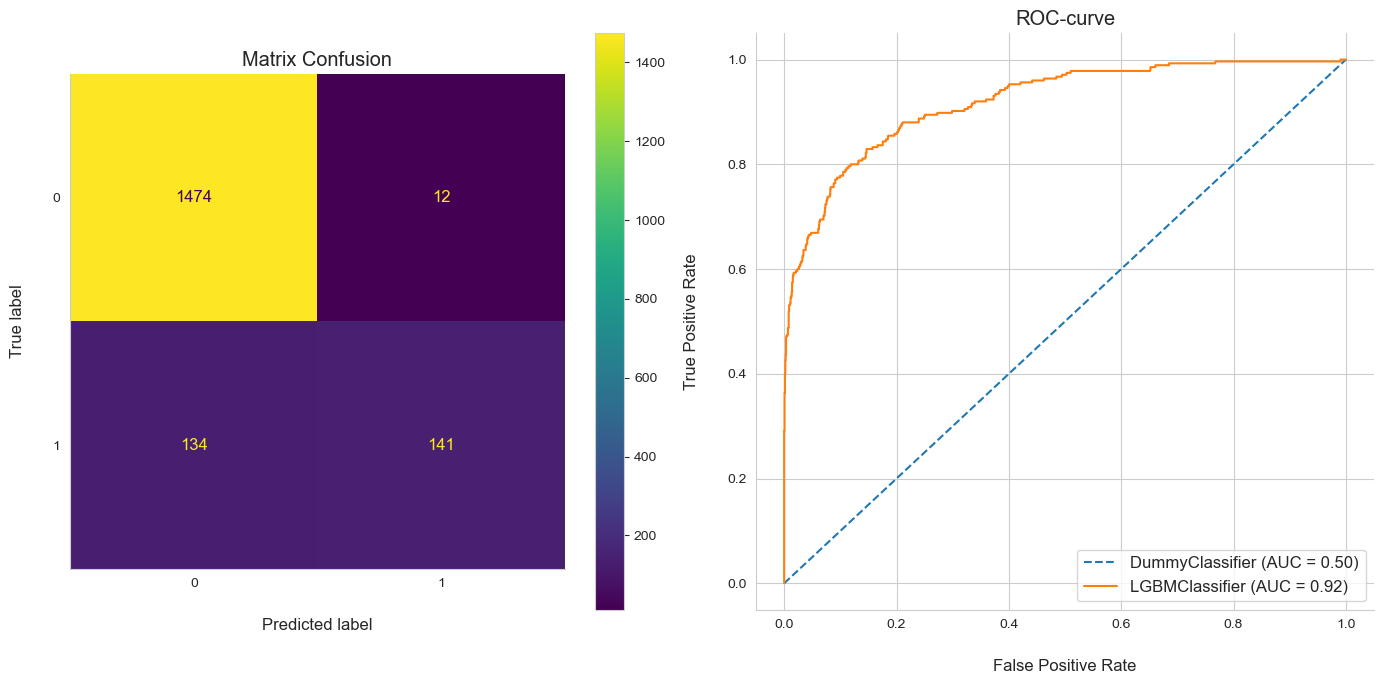

In [100]:
# выводим комплексный отчёт классификации
get_report_scores(best_model, X_test, y_test)

Первым делом обратимся к матрице неточностей. Из всей выборки модель правильно угадала положительный класс (клиент ушёл) всего в половине случаев – $141$ из $275$. Об этом нам говорят, помимо матрицы неточностей, метрика *recall*, она же доля положительных ответов *TPR* –  $0.51$. 

С отрицательным классом (клиент не ушёл) модель справилась намного лучше – $1474$ угаданных из $1761$, при этом ложно отметила клиентов как уходящих всего $12$ раз, то есть $1\%$ от общего количества (*FPR*). Именно из-за этого мы имеем такое высокое значение *accuracy* – $0.92$. При нашем дисбалансе в пользу отрицательного класса и отличной способности модели определять отрицательный класс, *accuracy* является не объективной мерой.

ROC-кривая нашей модели на графике стремится к идеальной и не сравнима с кривой фиктивной модели. Это значит, что наша модель является адекватной. Согласно [шкале оценки качества AUC-ROC](https://loginom.ru/blog/classification-quality#auc-roc), наша оценка в $0.92$ является отличной.

### Важность признаков

Изучим признаки, которые модель при обучении посчитала гаиболее важными для определния класса.  

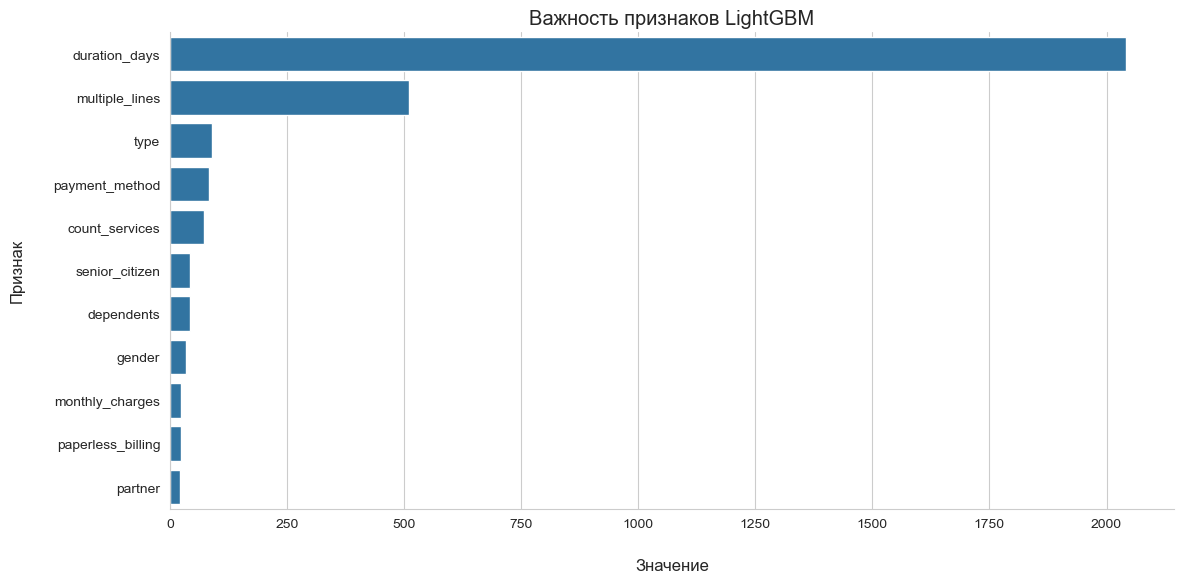

In [101]:
# собираем важность признаков в датафрейм
feature_importance = pd.DataFrame(
    data=sorted(zip(best_model.steps[1][1].feature_importances_, X_test.columns)),
    columns=['value', 'feature']).sort_values(by='value', ascending=False)

# строим график важности признаков
sns.barplot(data=feature_importance, x='value', y='feature')
#  настраиваем график
plt.title('Важность признаков LightGBM')
plt.xlabel('Значение')
plt.ylabel('Признак');

Самыми важными признаками для модели в определении класса оказались *длительность договора в днях* и *наличие мультиканального телефона*. Остальные признаки выделяются в три группы с небольшой разницей в значении важности:

- *тип договора*, *способ оплаты*, *количество подключённых интернет-услуг*
- *статус пенсионера*, *наличие иждевенцов*, *пол*;
- *ежемесячные траты*, *наличие электронного чека*, *наличие супруга/супруги*.

Вероятно, удалив малозначительные признаки, мы не должны потерять в качестве предсказаний нашей модели.

### Вывод

На данном этапе мы написали полный пайплайны обучения, включающие обработку признаков перед моделированием. Для эксперимента мы выбрали несколько алгоритмов машинного обучения:

*Ridge* – линейная модель с регуляризацией весов;
*Decision Tree* – решающее дерево;
*LightGMB* – градиентный бустинг от *Microsoft*;
*CatBoost* – градиентный бустинг от *Yandex*.

Также мы составили сетки гиперпараметров для каждой из них и провели поиск оптимальных с обучением на кросс-валидации. Все результаты эксперимента мы записали в сводную таблицу. По итогу лучшей моделью оказался градиентный бустинг *LightGBM* от *Microsoft*.

Тестирование модели на отложенной выборке дало результаты не хуже крос-валидации – метрика *AUC-ROC* была равна $0.92$, что значительно превышает установленный заказчиком уровень в $0.85$.

Анализ модели показал, что модель ошибается в прогнозах в половине случаев положительного класса, при этом практически полностью предсказывает отрицательный класс. *ROC-кривая* сильно отличается от кривой фиктивной модели. Это означает, что обученная модель является адекватной.

Анализ важности признаков показал, что при обучении самыми важными признаками для моделю являются *длительность договора в днях* и *наличие услуги многоканального телефона*. Осталные $9$ признаков оказались менее важными. Их значение важности значительно меньше по сравнению с лидерами.

## Отчёт проекта

Целью данного проекта было научиться прогнозировать отток клиентов на основе предоставленных данных. Перед нами стояла задача разработать модель, которая будет предсказывать отток клиентов с достаточной точностью.

После проработки запроса клиента мы составили следующий план:

- **Обзор данных**. Необходимо было ознакомиться с предоставленными файлами, проверить их на корректность: описание признаков, наличие пропусков и дубликатов записей, используемые типы данных, уникальные значения. Это должно было дать нам общее представление о данных и возможных проблемах;
- **Предобработка и анализ данных**. Здесь мы должны были исправить обнаруженные проблемы, после чего провести детальный анализ. Результатом данного этапа должно было быть явное представление о взаимодействии признаков и их важности;
- **Подготовка признаков**. Для того, чтобы мы смогли использовать данные, их необходимо было подготовить определённым образом: удалить малоинформативные признаки и шум, добавить новые, нормировать и закодировать, а также разделить на выборки;
- **Моделирование**. Для решения поставленной задачи необходимо было выбрать несколько алгоритмов и обучить их с целью выбрать самый подходящий под специфику запроса. Здесь важно было праильно настроить процесс обучения и корректно оценить результаты. Итогом данного этапа должна была быть готовая модель машинного обучения, способная максимально качественно решать поставленную задачу;
- **Тестирование**. Нам необходимо было убедиться в адекватности выбранной модели на отложенных данных. Результат тестирования должен быть аргументом того, что поставленная задача выполняется.

В ходе проекта все шаги были выполнены и итоговое решение в точности совпадает с составленным планом, за исключением того, что генерация новых признаков происходила на этапе анализа данных, а не на последующем этапе подготовки признаков. Это произошло по причине того, что новые признаки возникли на основе имеющихся и их необходимо было проанализировать, изучить взаимодействие с целевым признаком так сказать на месте.

Результатом нашего решения является высокое значение метрики на этапе тестирования обученной модели. Достичь этого мы смогли благодаря пониманию предоставленных данных и методичному выполнению всех обозначенных пунктов плана. Конкретно мы выполнили следующее:

1. Загрузили данные. Заказчик предоставил нам четрые файла:

	- `contract_new.csv` — информация о договоре. Содержит *идентификационный номер пользователя, даты начала и окончания действия договора, тип и способ оплаты, предоставление электронного чека, ежемесячные и суммарные траты за всё время*;
	- `personal_new.csv` – персональные данные клиента, включающие в себя: *идентификационный номер пользователя, пол, статус вступления в пенсионный возраст, наличие супруга/супруги, наличие иждевенцев*;
	- `internet_new.csv` – информация об интернет-услугах: *тип подключения сети Интернет, блокировка небезопасных сайтов, облачное хранилище файлов для резервного копирования, антивирус, выделенная линия техничесткой поддержки, стримминговое телевидение, каталог фильмов*. Также здесь присутствует *идентификационный номер*;
	- `phone_new.csv` – информация об услугах телефонии. Содержит *идентификационный номер клиента* и *подключение телефонного аппарата к многоканальной линии*.

2. Провели первичный анализ, в ходе которого выяснили что:
	
    - всего наблюдается $7043$ записи о клиентах;
	- все *идентификационные номера клиентов* уникальны. В таблицах `contract_new.csv` и `personal_new.csv` они полностью совпадают;
	- данные в `internet_new.csv` и `phone_new.csv` содержат меньше записей по причине того, что некоторые клиенты не пользовались этими услугами;
	- у каждого пользователя есть *дата начала договора*;
	- списание средств происходит каждый месяц. Клиенту либо приходит оповещение об оплате, либо средства списываются автоматически; 
	- договоры бывают трех *типов*: месячные, годовые, двухлетние. По истечении срока договора расчитывается *сумма потраченных денег за всё время*;
	- все пользователи разделены на две категории: достигшие пенсионного возраста и не достигшие пенсионного возраста;
	- большинство предоставляемых услуг имеют бинарное значение: услуга подключена или не подключена;
	- во всех четырёх таблицах отсутствуют пропуски и дубликаты.

    Также нам удалось обнаружить некоторые проблемы, присутствующие в данных:
    
    - *дата окончания пользования услугами* содержит строковое значение, которое указывает на то, что клиент является активным пользователем услуг (на момент выгрузки не расторгнул договор);
    - *сумма потраченных денег за всё время* содержит строковое значение. На момент выгрузки данных было несколько клиентов, которые оформили годовой или двухлетний договор в этот же день и первая ежемесячная трата ещё не была зачислена в сумму трат за всё время. Поэтому у таких клиентов отсутсвует какой либо расчёт. Пропуск значения при выгрузке заменили на заглушку;
    - типы данных не во всех признаках были определены корректно. В том числе и из-за смешанных значений в вышеуказанных признаках;
    - имена столбцов не соответсвовали хорошему стилю написания.
    
3. Провели предобработку данных:

    - объединили все таблицы по *идентификационному номеру пользователя*. Так как таблицы `internet_new.csv` и `phone_new.csv` содержат неполный список номеров, то при объединении с `contract_new.csv` и `personal_new.csv` возникли пропуски;
    - исправили имена столбцов в соответствии с хорошим стилем написания *snake_case*: все заглавные символы были заменены на строчные, слова были разделены нижним подчёркиванием;
    - строковые значения в *дате окончания договора* и *суммы трат за всё время* были заменены на пропуски при смене типа данных;
    - скорректировали типы данных: *дату начала договора* и *дату окончания договора* привели к `datetime`, а *сумму тарт за всё время* – к числовому `float`;
    - были изменены значения *статуса пенсионного возраста* с `1` и `0` на `Yes` и `No`, так как все бинарные признаки имели именно такие значения;
    - возникшие пропуски в признаках таблиц `internet_new.csv` и `phone_new.csv` были заменены на значение `Not used`, так как пользователи такими услугами в принципе не пользовались;
    - пропуски в *сумме трат за всё время* мы заполнили значением из *ежемесячных трат*, так как у пользователей, заключивших долгосрочный договор в прошлом месяце данная схема прослеживается;
    - пропуски в *дате окончания договора* мы заполнили датой выгрузки данных. Данную стратегию мы объясняем тем, что на этапе анализа данных мы вывели новую переменную *длительность договора* как разница между датой отсечки и датой начала договора. 
    
4. Провели анализ данных, который показал нам, что:
    
    - соотношение класса ушедших клиентов ($16\%$) к классу не ушедших ($84\%$) составляет $1:6$;
    - с увеличением *длительности договора*, отток клиентов также увеличивается; Достигнув отметки в $1000$ дней, происходит постепенный спад уходящих клиентов;
    - максимальный отток клиентов приходится на второй-третий год договора. Чем старше клиенты (дольше договоры), тем они меньше задумываются о расторжении;
    - самый популярный *тип договора* это месячный. Его выбирали в три раза чаще, чем готовой или двухлетний. Количество ушедших клиентов примерно одинаковая. Но если рассматривать долю ушедших по каждому договору, то она больше на долгосрочных;
    - $65\%$ ушедших клиентов использовало электронный чек. Среди не ушедших чек использовали $58\%$. *Наличие электронного чего* не сильно влияет на уход клиента; 
    - доля ушедших клиентов довольно высока у тех, кто пользовался автоматическим списанием средств. Самый популярный *способ оплаты* это электронное оповещение. Самая маленькая доля ушедших клиентов – у категории почтового оповещения;
    - ушедшие люди чаще всего платили около  $100\%$ условных единиц за услуги компании ежемесячно, в то время как общая сумма трат достигала  $1000\%$;
    - *пол* клиента не влияет на отток. Среди женщин и мужчин одинаковая доля ушедших, как и общее количество наблюдений;
    - значительное число клиентов — люди, не вошедшие в *пенсионный возраст*. Именно они чаще уходят (хотя доля ушедших больше у пенсионеров), а также клиенты имеющие *супруга/супругу* и *без иждевенцев*;
    - из основных услуг «Интернет-телефония» самыми популярными являются *оптоволокно* и отсутствие *многоканального телефона*. Чаще всего ушедшие использовали *оптоволокно* и/или *многоканальный телефон*;
    - наличие *дополнительных интернет-услуг* характерно для ушедшего клиентаю С количеством подключённых услуг растёт и количество ушедших клиентов.

    Во время анализа были сгенерированы новые признаки:
        
    - *длительность договора в днях*. Так как *даты начала и окончания договоров* были сложными для интерпретации в разрезе оттока клиента, мы решили использовать их разницу;
    - *длительность договора в годах*. По смыслу тот же признак, только разбитый на крупные корзины значений;
    - *наличие автоматического списания средств*. Высокая доля ушедших у данных категорий натолкнула на мысль сгруппировать признак по такому способу оплаты;
    - *количество подключенных дополнительных интернет-услуг*. Наличие большого количества дополнительных услуг продиктовало их агрегацию.

5. Провели корреляционный анализ и выявили следующие зависимости:
    
    - интернет-услуги весьма сильно коррелируют между собой. Видимо дополнительные услуги преобретаются пачкой;
    - весьма высокая корреляция наблюдается у *длительности в днях* и c *датой начала договора*. Это ожидаемо, так как второй признак стал основой для первого;
    - полностью зависимыми являются признаки *способ оплаты* с *наличием автоматического списания средств* и *дата окончания договора* с *уходом клиента*. В обоих случаях первый признак стал основой для генерации второго;
    - *ежемесячная трата* и *тип подключения* создают весьма высокую связь. Тип подключения явно влияет на ежемесячный платёж за услуги.
    
6. Удалили малоинформативные признаки. Такими являлись *идентификационный номер клиента*, *дата начала договора* и *дата окончания договора*. Там где была возможность, мы использовали всю полезную информацию этих признаков.
7. Отобрали коррелирующие признаки выше $0.8$ и проанализировали их для устранения коллинеарности. Из коррелирующих пар были удалены следующие признаки:

    - *тип подключения*. Потому что коррелирующая с ним ежемесячная трата имела большую связь с целевым признаком. Также были удалены все дополнительные интернет-услуги. Вместо них мы создали агрегирующий признак *количество подключённых услуг*;
    - *длительность договора в годах*. Потому что коррелирующая с ним *длительность договора в днях* имела большую связь с целевым признаком;
    - *сумма трат за всё время*. Сильно коррелировала с *длительностью договора в днях*;
    - *наличие автоматического списания средст*. Дублирующий признак *способа оплаты* и уступающий по взаимосвязям.

8. Выделили целевой признак.
9. Сформировали списки числовых и категориальных признаков для удобства дальнейшей работы.
10. Разделили данные на обучающую и тестовую выборки в процентном соотношении $75:25$. 
11. Масштабировали числовые признаки методом стандартизации.
12. Закодировали категориальные признаки:

    - для бинарных признаков мы написали свой кодировщик. Готовые решения не подошли нам, так как увеличивают размерность данных, а мы хотели этого избежать;
    - для признаков, имеющих более двух категорий, мы кодировали с помощью одной разновидности *Target Encoding*.
    
13. Написали пайплайн обучения, включающий обработку числовых и категориальных признаков. В качетсве предсказателей мы выбрали несколько разных классификаторов:
    
    - линейную модель с регуляризацией весов;
    - решающее дерево;
    - градиентный бустинг от *Microsoft*;
    - градиентный бустинг от *Yandex*.
    
14. Составили сетку гиперпараметров для поиска лучших настроек для каждой модели.
15. Обучили выбранные модели с подбором гиперпараметров на кросс-валидации. Параметры были следующие:
    
    - количество итераций поиска: 200;
    - количество фолдов: 10;
    - оценка качества: 'roc_auc'
    
    При обучении использовались следующие признаки, отобранные на этапе анализа и корреляционного анализа:
    
    - `type`, *тип договора*;
    - `paperless_billing`, *наличие электронного чека*;
    - `payment_method`, *способ оплаты*;
    - `monthly_charges`, *ежемесячные траты*;
    - `gender`, *пол*;
    - `senior_citizen`, *статус пенсионного возраста*;
    - `partner`, *наличие супруга/супруги*;
    - `dependents`, *наличие иждевенцев*;
    - `multiple_lines`, *наличие подключенного многоканального телефона*;
    - `duration_days`, *длительность договора в днях*;
    - `count_services`, *количество подключенных дополнительных услуг*.
    
    Результаты эксперимента получились следующие:
    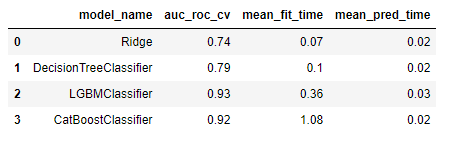
    
    Лучшей моделью эксперимента оказался градиентный бустинг *LightGBM* от *Microsoft*. Для него мы составили следующую сетку гиперпараметров для поиска:

    - *количество деревьев*: от $100$ до $1000$ с шагом $100$;
    - *макисмальная глубина дерева*: от $1$ до $16$, включая автоматический выбор;
    - *шаг обучения*: $0.01, 0.1, 0.5, 1$.
    
    Лучшими гиперпараметрами модели оказались:
    
    - *количество деревьев*: $1000$;
    - *макисмальная глубина дерева*: $2$;
    - *шаг обучения*: $0.1$.

16. Протестировали лучшую модель на отложенной выборке. Она показала результаты не хуже обучения с кросс-валидацией. Метрика *AUC-ROC* была выше установленной нормы – $0.92$.
    
    Анализ модели показал, что из всей выборки модель правильно угадала положительный класс (клиент ушёл) всего в половине случаев – $141$ из $275$. Об этом нам говорят, помимо матрицы неточностей, метрика *recall*, она же доля положительных ответов *TPR* –  $0.51$. 

    С отрицательным классом (клиент не ушёл) модель справилась намного лучше – $1474$ угаданных из $1761$, при этом ложно отметила клиентов как уходящих всего $12$ раз, то есть $1\%$ от общего количества (*FPR*). Именно из-за этого мы имеем такое высокое значение *accuracy* – $0.92$. При нашем дисбалансе в пользу отрицательного класса и отличной способности модели определять отрицательный класс, *accuracy* является не объективной мерой.

    ROC-кривая нашей модели на графике стремится к идеальной и не сравнима с кривой фиктивной модели. Это значит, что наша модель является адекватной. Согласно [шкале оценки качества AUC-ROC](https://loginom.ru/blog/classification-quality#auc-roc), наша оценка в $0.92$ является отличной.
    
    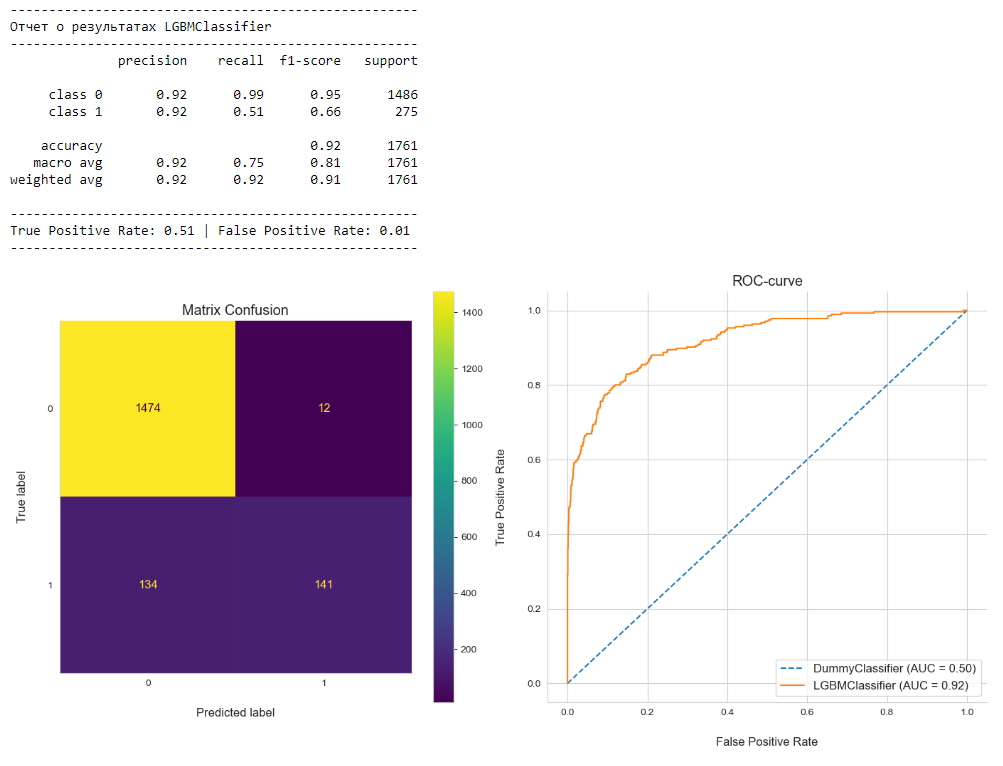
    
    Самыми важными признаками для модели в определении класса оказались длительность договора в днях и наличие мультиканального телефона. Соотнесём это с нашими наблюдениями.

    На этапе анализа данных мы наблюдали явную нелинейную зависимость длительности с оттоком: к сроку  $1000$ дней всё больше клиентов решалось уйти, но после этого рубежа отток спадал на нет. И чем старше становился договор, тем меньше клиентов уходило. Что же касается корреляции длительности с целевым признаком, то тут мы наблюдали умеренную зависимость. Вероятно модель использовала и другие зависимости для критерия отбора.

    Что же касается наличия услуги многоканального телефона, то это одна из основных услуг компании, наряду с интернет-услугами. И здесь при наличии этой услуги отток наблюдался больше, чем у клиентов с обычным стационарным телефоном. Возможно, при наличии в данных интернет-услуг, которые мы удалили, важность признаков была бы иной.

    Не оправдали наши ожидания такие признаки как количество подключённых интернет-услуг и ежемесячные траты. В них наблюдался отток клиентов по мере увеличения значений. Опять таки, при наличии другого набора признаков, мы могли бы наблюдать иную картину важности признаков.
    
    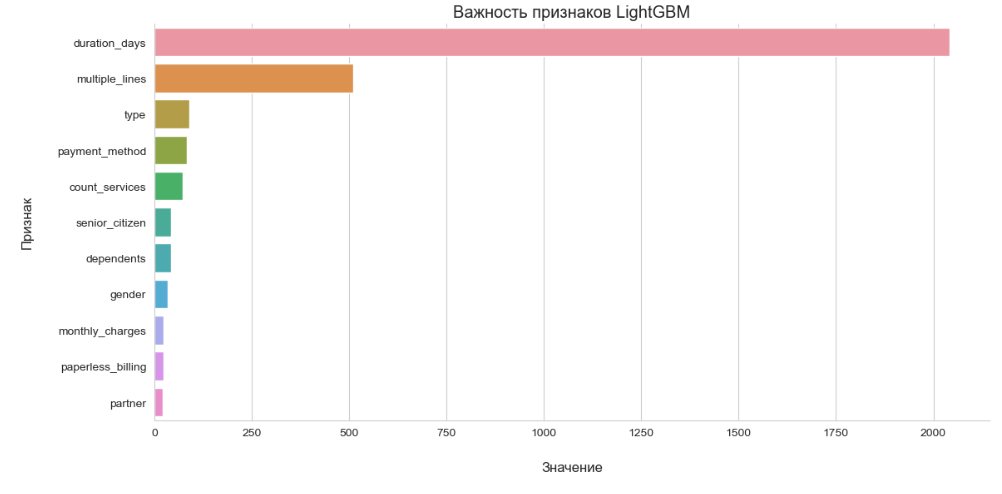
    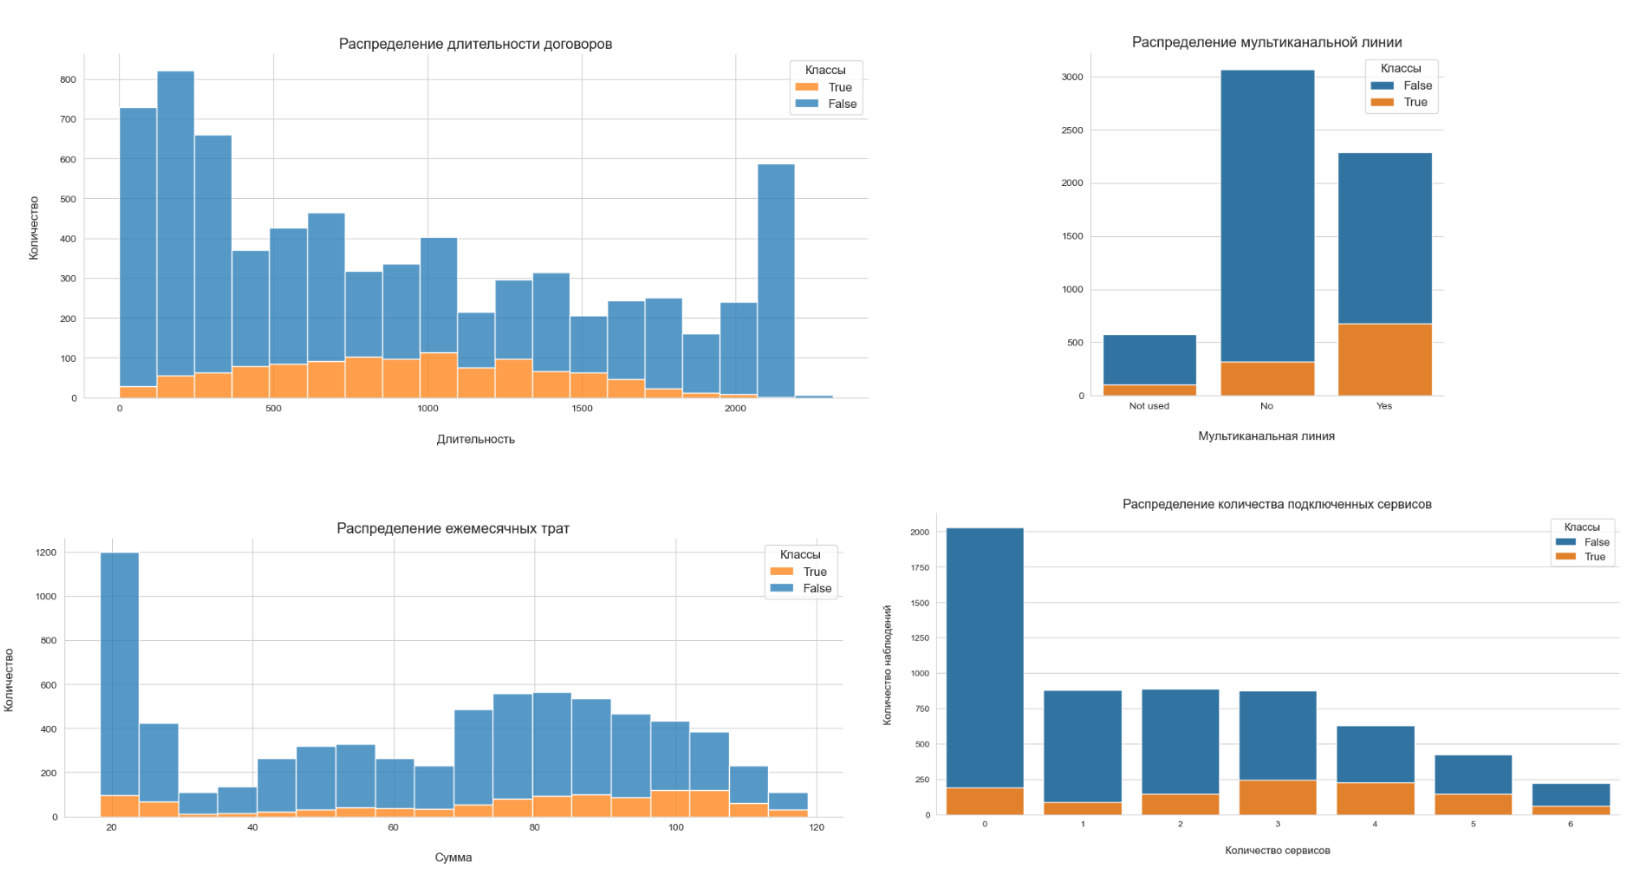

### Заключение

С точки зрения бизнеса при использовании нашей модели заказчик может потерять половину клиентов, которые собираются уходить. В то же время ложноотмеченных будет совсем мало. Дальнейшее развитие данной ситуации зависит от того, что считать ошибкой первого и второго рода. Это зависит от бюджетов комании на привлечение и удержание клиентов, о которых нам ничего не известно. 

Если компания много тратит на привлечение клиента, (а реальная действительность нам подсказывает, что дешевле удержать клиента), то могут быть значительные финансовые потери, когда неотмеченные клиенты уйдут. И наоборот, если компания много вкладывается в удержание, при этом привлечение происходит органически, то финансовых потерь не ожидается.

Так или иначе идеального решениямы не достигли: точное определение истинного класса клиента и минимизация ложных прогнозов. Но поставленные цель и задачу мы выполнили: научились предсказывать отток клиентов, разработав предсказаетльную модель.

В качесте рекомендаций хотелось бы отметить несколько моментов:

- При использовании полученной модели не стоит полностью полагаться на её работу. Удержание клиентов должно быть комплексным. В дополнение к предсказаниям можно использовать маркетинговые исследования, опросы, отзывы и прочее. Данная задача является частью большого отдела по работе с клиентами. Тут должна быть коммуникация.
- Для повышения качества выявления оттока клиентов моделью необходимо использовать сбалансированные данные. Так как мы видим результат – модели не хватает образцов положительного класса для выстраивания более явных взаимосвязей при обучении.
- Также следует более чательно проработать признаковый набор: более глубже их изучить и повысить информативность путем создания новых. 